In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
#EDA Process
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [5]:
df.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [8]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

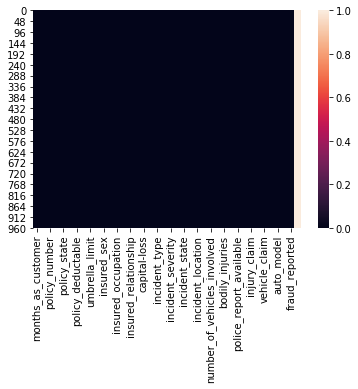

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
#_c39 Columns has All Values are Null so deleting this colum
df.drop("_c39", axis=1,inplace=True)
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [11]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [12]:
#finding the unique values of dataset
df['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

In [13]:
df['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

In [14]:
df['policy_number'].unique()

array([521585, 342868, 687698, 227811, 367455, 104594, 413978, 429027,
       485665, 636550, 543610, 214618, 842643, 626808, 644081, 892874,
       558938, 275265, 921202, 143972, 183430, 431876, 285496, 115399,
       736882, 699044, 863236, 608513, 914088, 596785, 908616, 666333,
       336614, 584859, 990493, 129872, 200152, 933293, 485664, 982871,
       206213, 616337, 448961, 790442, 108844, 430029, 529112, 939631,
       866931, 582011, 691189, 537546, 394975, 729634, 282195, 420810,
       524836, 307195, 623648, 485372, 598554, 303987, 343161, 519312,
       132902, 332867, 356590, 346002, 500533, 348209, 486676, 260845,
       657045, 761189, 175177, 116700, 166264, 527945, 627540, 279422,
       484200, 645258, 694662, 960680, 498140, 498875, 798177, 614763,
       679370, 958857, 686816, 127754, 918629, 731450, 307447, 992145,
       900628, 235220, 740019, 246882, 797613, 193442, 389238, 760179,
       939905, 872814, 632627, 283414, 163161, 853360, 776860, 149367,
      

In [15]:
#All values of Policy Numbers are unique so It would not be useful to predict the out.
df.drop("policy_number", axis=1,inplace=True)
df

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       17-10-2014           OH    250/500   
1                   228   42       27-06-2006           IN    250/500   
2                   134   29       06-09-2000           OH    100/300   
3                   256   41       25-05-1990           IL    250/500   
4                   228   44       06-06-2014           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       16-07-1991           OH   500/1000   
996                 285   41       05-01-2014           IL    100/300   
997                 130   34       17-02-2003           OH    250/500   
998                 458   62       18-11-2011           IL   500/1000   
999                 456   60       11-11-1996           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... witnesses police_report_available total_claim_amount  \
0          MALE  ...         2                     YES              71610   
1          MALE  ...         0                       ?               5070   
2        FEMALE  ...         3                      NO              34650   
3        FEMALE  ...         2                      NO              63400   
4          MALE  ...         1                      NO               6500   
..          ...  ...       ...                     ...                ...   
995      FEMALE  ...         1                       ?              87200   
996      FEMALE  ...         3                       ?             108480   
997      FEMALE  ...         3                     YES              67500   
998        MALE  ...         1                     YES              46980   
999      FEMALE  ...         3                       ?               5060   

    injury_claim  property_claim  vehicle_claim   auto_make auto_model  \
0           6510           13020          52080        Saab        92x   
1            780             780           3510    Mercedes       E400   
2           7700            3850          23100       Dodge        RAM   
3           6340            6340          50720   Chevrolet      Tahoe   
4           1300             650           4550      Accura        RSX   
..           ...             ...            ...         ...        ...   
995        17440            8720          61040       Honda     Accord   
996        18080           18080          72320  Volkswagen     Passat   
997         7500            7500          52500      Suburu    Impreza   
998         5220            5220          36540        Audi         A5   
999          460             920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[100

In [16]:
df['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

In [17]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [18]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [19]:
df['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [20]:
df['policy_annual_premium'].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

In [21]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [22]:
df['insured_zip'].unique()

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

In [23]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [24]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [25]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [26]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [27]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [28]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [29]:
df['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

In [30]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [31]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [32]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [33]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [34]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [35]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [36]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [37]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [38]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [39]:
df['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [40]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [41]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [42]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [43]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [44]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [45]:
#Replacing ? with 0
df.replace('?', 0,inplace=True)
df

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       17-10-2014           OH    250/500   
1                   228   42       27-06-2006           IN    250/500   
2                   134   29       06-09-2000           OH    100/300   
3                   256   41       25-05-1990           IL    250/500   
4                   228   44       06-06-2014           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       16-07-1991           OH   500/1000   
996                 285   41       05-01-2014           IL    100/300   
997                 130   34       17-02-2003           OH    250/500   
998                 458   62       18-11-2011           IL   500/1000   
999                 456   60       11-11-1996           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... witnesses police_report_available total_claim_amount  \
0          MALE  ...         2                     YES              71610   
1          MALE  ...         0                       0               5070   
2        FEMALE  ...         3                      NO              34650   
3        FEMALE  ...         2                      NO              63400   
4          MALE  ...         1                      NO               6500   
..          ...  ...       ...                     ...                ...   
995      FEMALE  ...         1                       0              87200   
996      FEMALE  ...         3                       0             108480   
997      FEMALE  ...         3                     YES              67500   
998        MALE  ...         1                     YES              46980   
999      FEMALE  ...         3                       0               5060   

    injury_claim  property_claim  vehicle_claim   auto_make auto_model  \
0           6510           13020          52080        Saab        92x   
1            780             780           3510    Mercedes       E400   
2           7700            3850          23100       Dodge        RAM   
3           6340            6340          50720   Chevrolet      Tahoe   
4           1300             650           4550      Accura        RSX   
..           ...             ...            ...         ...        ...   
995        17440            8720          61040       Honda     Accord   
996        18080           18080          72320  Volkswagen     Passat   
997         7500            7500          52500      Suburu    Impreza   
998         5220            5220          36540        Audi         A5   
999          460             920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[100

In [46]:
#Convert the Dataset to Numeric-(boolean) Format using label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==2):          #Unique values
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])
        
        
df   

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       17-10-2014           OH    250/500   
1                   228   42       27-06-2006           IN    250/500   
2                   134   29       06-09-2000           OH    100/300   
3                   256   41       25-05-1990           IL    250/500   
4                   228   44       06-06-2014           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       16-07-1991           OH   500/1000   
996                 285   41       05-01-2014           IL    100/300   
997                 130   34       17-02-2003           OH    250/500   
998                 458   62       18-11-2011           IL   500/1000   
999                 456   60       11-11-1996           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ... witnesses police_report_available total_claim_amount  \
0              1  ...         2                     YES              71610   
1              1  ...         0                       0               5070   
2              0  ...         3                      NO              34650   
3              0  ...         2                      NO              63400   
4              1  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995            0  ...         1                       0              87200   
996            0  ...         3                       0             108480   
997            0  ...         3                     YES              67500   
998            1  ...         1                     YES              46980   
999            0  ...         3                       0               5060   

    injury_claim  property_claim  vehicle_claim   auto_make auto_model  \
0           6510           13020          52080        Saab        92x   
1            780             780           3510    Mercedes       E400   
2           7700            3850          23100       Dodge        RAM   
3           6340            6340          50720   Chevrolet      Tahoe   
4           1300             650           4550      Accura        RSX   
..           ...             ...            ...         ...        ...   
995        17440            8720          61040       Honda     Accord   
996        18080           18080          72320  Volkswagen     Passat   
997         7500            7500          52500      Suburu    Impreza   
998         5220            5220          36540        Audi         A5   
999          460             920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              1  
1        2007              1  
2        2007              0  
3        2014              1  
4        2009              0  
..        ...            ...  
995      2006              0  
996      2015              0  
997      1996              0  
998      1998              0  
999      2007           

In [47]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [48]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [49]:
df['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [50]:
#all values of Incident Locations,policy_bind_date, auto_make,auto_model and auto_year are Unique.
#It wouldn't be useful to predict the output.

df.drop("policy_bind_date", axis=1,inplace=True)
df.drop("incident_location", axis=1,inplace=True)
df.drop("auto_make", axis=1,inplace=True)
df.drop("auto_model", axis=1,inplace=True)
df.drop("auto_year", axis=1,inplace=True)
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

    insured_education_level  ... number_of_vehicles_involved property_damage  \
0                        MD  ...                           1             YES   
1                        MD  ...                           1               0   
2                       PhD  ...                           3              NO   
3                       PhD  ...                           1               0   
4                 Associate  ...                           1              NO   
..                      ...  ...                         ...             ...   
995                 Masters  ...                           1             YES   
996                     PhD  ...                           1             YES   
997                 Masters  ...                           3               0   
998               Associate  ...                           1               0   
999               Associate  ...                           1               0   

    bodily_injuries  witnesses  police_report_available total_claim_amount  \
0                 1          2                      YES              71610   
1                 0          0                        0               5070   
2                 2          3                       NO              34650   
3                 1          2                       NO              63400   
4                 0          1                       NO               6500   
..              ...        ...                      ...                ...   
995               0          1                        0              87200   
996               2          3                        0             108480   
997               2          3                      YES              67500   
998               0          1                      YES              46980   
999               0          3                        0               5060   

    injury_claim property_claim vehicle_claim fraud_reported  
0           6510          13020         52080              1  
1            780            780          3510              1  
2           7700           3850         23100              0  
3           6340           6340         50720              1  
4           1300          

In [51]:
#Converting All Comuns into number
df = pd.get_dummies(df)
df

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip  insured_sex  capital-gains  capital-loss  \
0                 0       466132            1          53300             0   
1           5000000       468176            1              0             0   
2           5000000       430632            0          35100             0   
3           6000000       608117            0          48900        -62400   
4           6000000       610706            1          66000        -46000   
..              ...          ...          ...            ...           ...   
995               0       431289            0              0             0   
996               0       608177            0          70900             0   
997         3000000       442797            0          35100             0   
998         5000000       441714            1              0             0   
999               0       612260            0              0             0   

     incident_hour_of_the_day  ...  incident_city_Northbend  \
0                           5  ...                        0   
1                           8  ...                        0   
2                           7  ...                        0   
3                           5  ...                        0   
4                          20  ...                        0   
..                        ...  ...                      ...   
995                        20  ...                        0   
996                        23  ...                        1   
997                         4  ...                        0   
998                         2  ...                        0   
999                         6  ...                        0   

     incident_city_Northbrook  incident_city_Riverwood  \
0                           0                        0   
1                           0                        1   
2                           0                        0   
3                           0                        0   
4                           0                        0   
..                        ...                      ...   
995                         1                        0   
996                         0                        0   
997                         0                        0   
998                         0                        0   
999                         0                        0   

     incident_city_Springfield  property_damage_0  property_damage_NO  \
0                            0                  0                   0   
1                            0                  1                   0   
2                            0                  0                   1   
3                            0                  1                   0   
4                            0                  0                   1   
..                         ...                ...                 ...   
995                          0                  0                   0   
996                          0                  0                   0   
997                          0                  1                   

In [52]:
df['fraud_reported'].unique()

array([1, 0], dtype=int64)

In [53]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  insured_sex  \
count            1000.000000    1.000000e+03    1000.000000  1000.000000   
mean             1256.406150    1.101000e+06  501214.488000     0.463000   
std               244.167395    2.297407e+06   71701.610941     0.498879   
min               433.330000   -1.000000e+06  430104.000000     0.000000   
25%              1089.607500    0.000000e+00  448404.500000     0.000000   
50%              1257.200000    0.000000e+00  466445.500000     0.000000   
75%              1415.695000    0.000000e+00  603251.000000     1.000000   
max              2047.590000    1.000000e+07  620962.000000     1.000000   

       capital-gains   capital-loss  incident_hour_of_the_day  ...  \
count    1000.000000    1000.000000               1000.000000  ...   
mean    25126.100000  -26793.700000                 11.644000  ...   
std     27872.187708   28104.096686                  6.951373  ...   
min         0.000000 -111100.000000                  0.000000  ...   
25%         0.000000  -51500.000000                  6.000000  ...   
50%         0.000000  -23250.000000                 12.000000  ...   
75%     51025.000000       0.000000                 17.000000  ...   
max    100500.000000       0.000000                 23.000000  ...   

       incident_city_Northbend  incident_city_Northbrook  \
count              1000.000000                1000.00000   
mean                  0.145000                   0.12200   
std                   0.352277                   0.32745   
min                   0.000000                   0.00000   
25%                   0.000000                   0.00000   
50%                   0.000000                   0.00000   
75%                   0.000000                   0.00000   
max                   1.000000                   1.00000   

       incident_city_Riverwood  incident_city_Springfield  property_damage_0  \
count              1000.000000                1000.000000         1000.00000   
mean                  0.134000                   0.157000            0.36000   
std                   0.340823                   0.363983            0.48024   
min                   0.000000                   0.000000            0.00000   
25%                   0.000000                   0.000000            0.00000   
50%                   0.000000                   0.000000            0.00000   
75%                   0.000000                   0.000000            1.00000   
max                   1.000000                   1.000000            1.00000   

       property_damage_NO  property_damage_YES  police_report_available_0  \
count         1000.000000          1000.000000                1000.000000   
mean             0.338000             0.302000                   0.343000   
std              0.473265             0.459355                   0.474949   
min              0.000000             0.000000                   0.000000   
25%              0.000000             0.000000                   0.000000   
50%              0.000000             0.000000                   0.000000   
75%              1.000000             1.000000                   1.000000   
max              1.000000             1.000000                   1.000000   

       police_report_available_NO  police_report_available_YES  
count                 1000.000000                  1000.000000  
mean                     0.343000                     0

In [54]:
dfcor = df.corr()
dfcor

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
...                                         ...       ...                ...   
property_damage_NO                     0.001425  0.004067          -0.001618   
property_damage_YES                    0.005488 -0.003408           0.015770   
police_report_available_0             -0.051763 -0.045002          -0.014288   
police_report_available_NO             0.073415  0.064987          -0.022899   
police_report_available_YES           -0.022146 -0.020441           0.038036   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
...                                            ...             ...   
property_damage_NO                        0.006875        0.050508   
property_damage_YES                       0.080738       -0.076358   
police_report_available_0                -0.001740        0.051701   
police_report_available_NO               -0.019766       -0.007929   
police_report_available_YES               0.021998       -0.044771   

                             insured_zip  insured_sex  capital-gains  \
months_as_customer              0.017895     0.060925       0.006399   
age                             0.025604     0.073337      -0.007075   
policy_deductable               0.004545    -0.009733       0.035212   
policy_annual_premium           0.032354     0.038853      -0.013738   
umbrella_limit                  0.019671     0.010688      -0.047268   
...                                  ...          ...            ...   
property_damage_NO              0.057208    -0.002094       0.042236   
property_damage_YES             0.023861     0.026969      -0.000616   
police_report_available_0       0.039665    -0.028766       0.008231   
police_report_available_NO     -0.049287     0.021930       0.004420   
police_report_available_YES     0.009841     0.006992      -0.012939   

                             capital-loss  incident_hour_of_the_day  ...  \
months_as_customer               0.020209                  0.070639  ...   
age                              0.007368                  0.087161  ...   
policy_deductable               -0.023544                  0.060935  ...   
policy_annual_premium            0.023547                 -0.001578  ...   
umbrella_limit                  -0.024056                 -0.023257  ...   
...                                   ...                       ...  ...   
property_damage_NO              -0.023957                 -0.004160  ...   
property_damage_YES              0.016981                  0.064425  ...   
police_report_available_0        0.008065                 -0.029983  ...   
police_report_available_NO       0.030315                 -0.009669  ...   
police_report_available_YES     -0.039256                  0.040558  ...   

                             incident_city_Northbend  \
months_as_customer                          0.018258   
age                                         0.012292   
policy_deductable                           0.003622   
policy_annual_premium                      -0.005006   
umbrella_limit                             -0.024298   
...                                              ...   
property_damage_NO                         -0.006064   
p

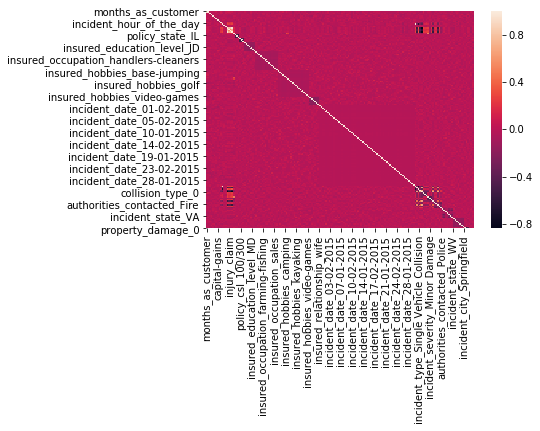

In [55]:
sns.heatmap(dfcor)

In [56]:
#finding the skewness of the dataset

df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
                                 ...   
property_damage_NO             0.685977
property_damage_YES            0.863806
police_report_available_0      0.662448
police_report_available_NO     0.662448
police_report_available_YES    0.802728
Length: 168, dtype: float64

In [57]:
##there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
                                 ...   
property_damage_NO             0.685977
property_damage_YES            0.863806
police_report_available_0      0.662448
police_report_available_NO     0.662448
police_report_available_YES    0.802728
Length: 168, dtype: float64

In [58]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (1000, 168)
df1.shape: (0, 168)
z value is: [[1.07813958 0.99083647 0.22238259 ... 0.72254413 0.72254413 1.47807759]
 [0.2089946  0.33407345 1.41278352 ... 1.38399852 0.72254413 0.67655447]
 [0.60800168 1.08891308 1.41278352 ... 0.72254413 1.38399852 0.67655447]
 ...
 [0.64276748 0.54161057 1.03996564 ... 0.72254413 0.72254413 1.47807759]
 [2.20802805 2.52328351 1.41278352 ... 0.72254413 0.72254413 1.47807759]
 [2.19064515 2.3043625  0.22238259 ... 1.38399852 0.72254413 0.67655447]]


In [59]:
df.keys()

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'incident_city_Northbend', 'incident_city_Northbrook',
       'incident_city_Riverwood', 'incident_city_Springfield',
       'property_damage_0', 'property_damage_NO', 'property_damage_YES',
       'police_report_available_0', 'police_report_available_NO',
       'police_report_available_YES'],
      dtype='object', length=168)

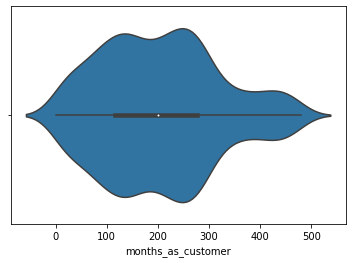

In [60]:
#violin plot representation with respect to each column

sns.violinplot(x="months_as_customer",data=df)

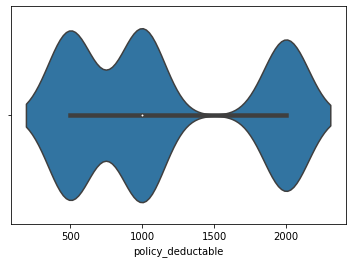

In [61]:
sns.violinplot(x="policy_deductable",data=df)

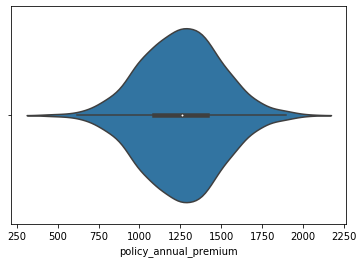

In [62]:
sns.violinplot(x="policy_annual_premium",data=df)

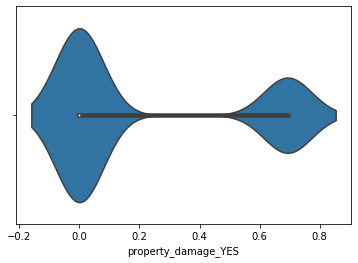

In [63]:
sns.violinplot(x="property_damage_YES",data=df)

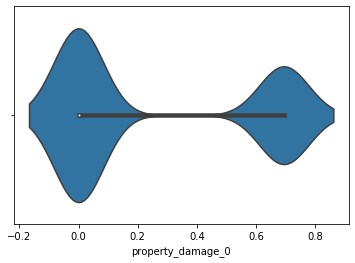

In [64]:
sns.violinplot(x="property_damage_0",data=df)

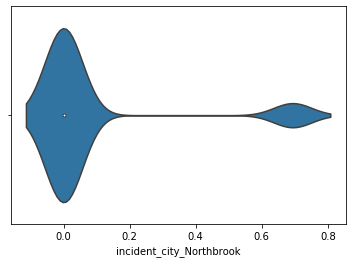

In [65]:
sns.violinplot(x="incident_city_Northbrook",data=df)

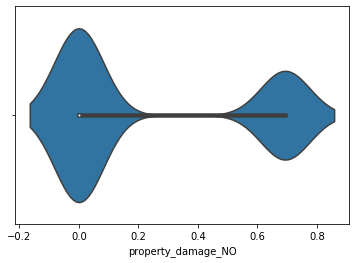

In [66]:
sns.violinplot(x="property_damage_NO",data=df)

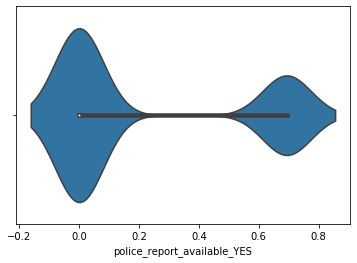

In [67]:
sns.violinplot(x="police_report_available_YES",data=df)

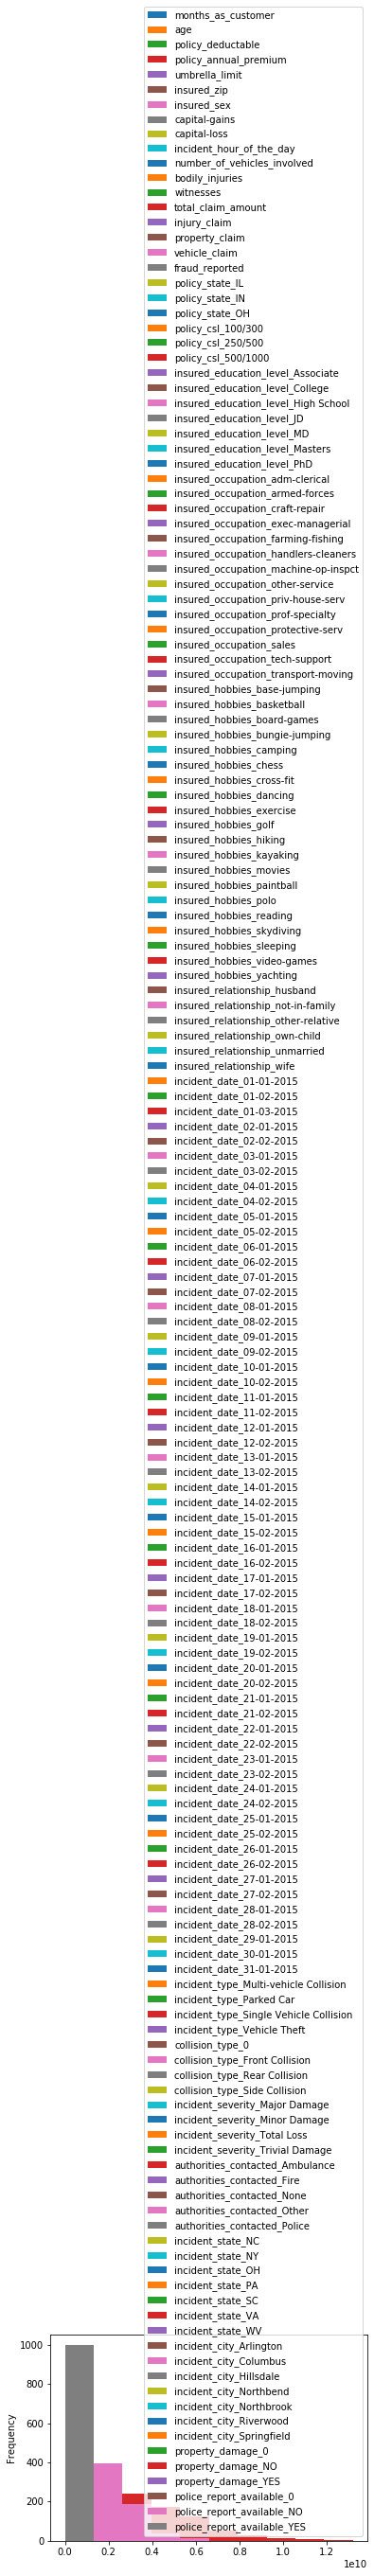

In [68]:
df.plot.hist()

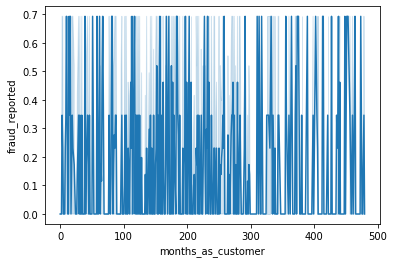

In [69]:
#Lets check the how age is changing with respect to income
sns.lineplot(df["months_as_customer"],df["fraud_reported"])
plt.show()

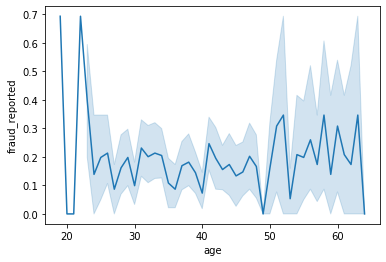

In [70]:
sns.lineplot(df["age"],df["fraud_reported"])
plt.show()

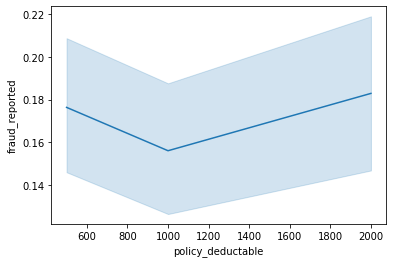

In [71]:
sns.lineplot(df["policy_deductable"],df["fraud_reported"])
plt.show()

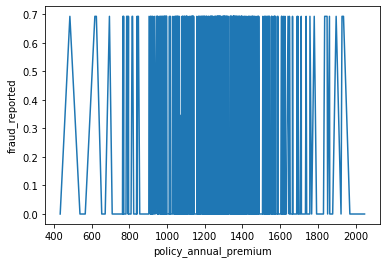

In [72]:
sns.lineplot(df["policy_annual_premium"],df["fraud_reported"])
plt.show()

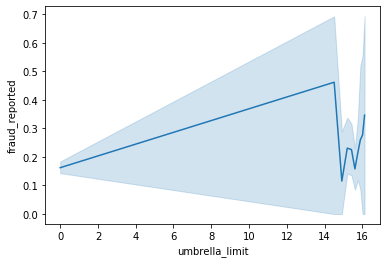

In [73]:
sns.lineplot(df["umbrella_limit"],df["fraud_reported"])
plt.show()

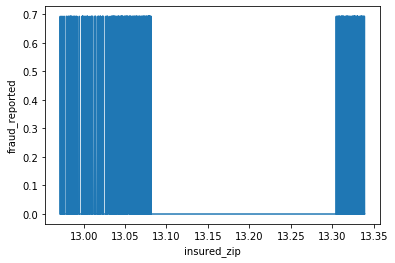

In [74]:

sns.lineplot(df["insured_zip"],df["fraud_reported"])
plt.show()

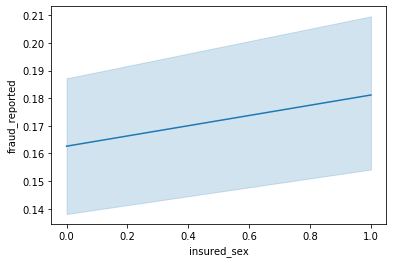

In [75]:
sns.lineplot(df["insured_sex"],df["fraud_reported"])
plt.show()

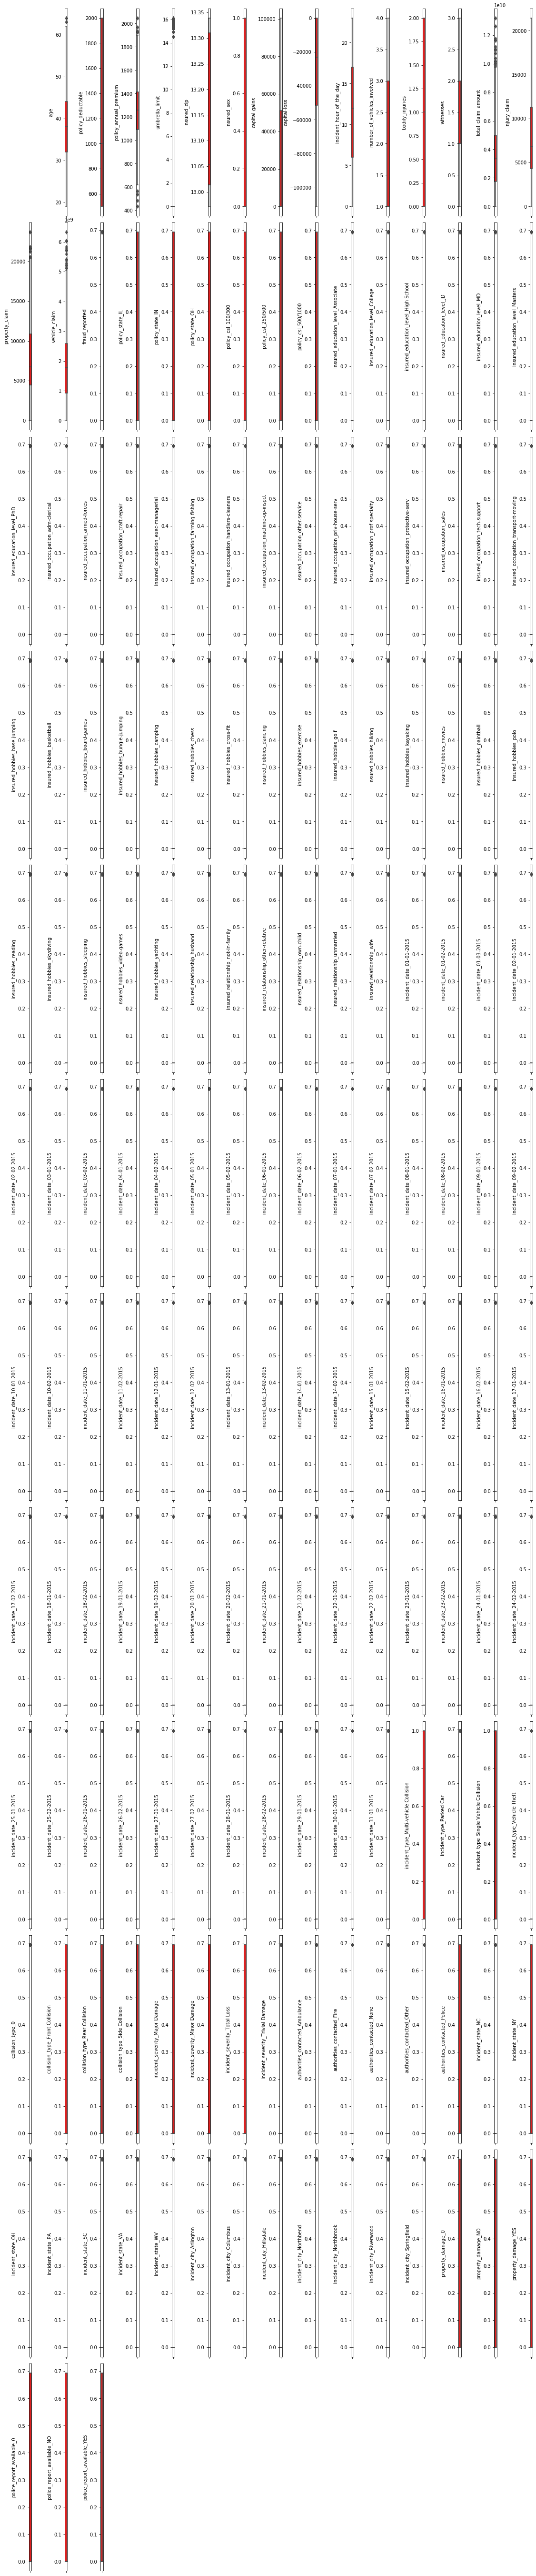

In [76]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

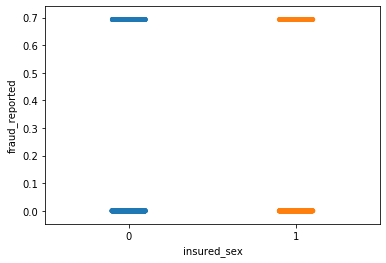

In [77]:
#strip plot representation

ax=sns.stripplot(x='insured_sex',y="fraud_reported",data=df);

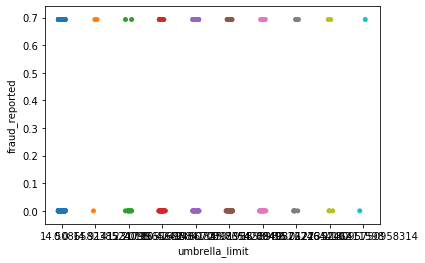

In [78]:
ax=sns.stripplot(x='umbrella_limit',y="fraud_reported",data=df);

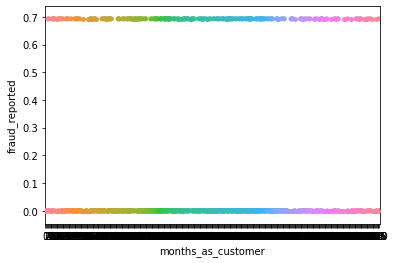

In [79]:
ax=sns.stripplot(x='months_as_customer',y="fraud_reported",data=df);

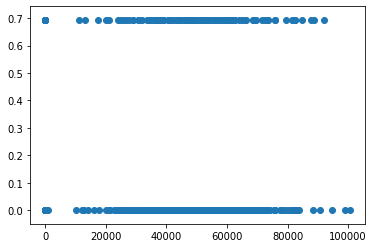

In [80]:
#using Scatter Plot
plt.scatter(df['capital-gains'],df['fraud_reported'])

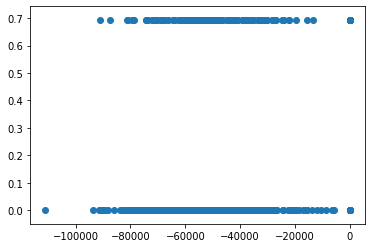

In [81]:
plt.scatter(df['capital-loss'],df['fraud_reported'])

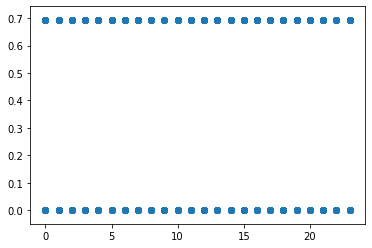

In [82]:
plt.scatter(df['incident_hour_of_the_day'],df['fraud_reported'])

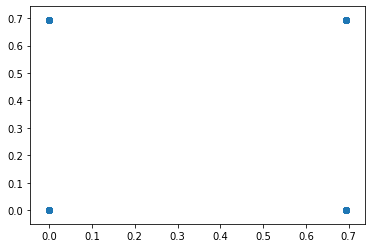

In [83]:
plt.scatter(df['incident_city_Northbend'],df['fraud_reported'])

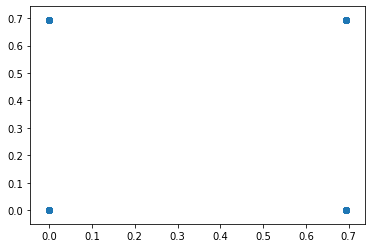

In [84]:
plt.scatter(df['incident_city_Northbrook'],df['fraud_reported'])

In [85]:
df.fillna(0,inplace=True)
df

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip  insured_sex  capital-gains  capital-loss  \
0          0.000000    13.052226            1          53300             0   
1         15.424949    13.056602            1              0             0   
2         15.424949    12.973011            0          35100             0   
3         15.607270    13.318124            0          48900        -62400   
4         15.607270    13.322373            1          66000        -46000   
..              ...          ...          ...            ...           ...   
995        0.000000    12.974536            0              0             0   
996        0.000000    13.318223            0          70900             0   
997       14.914123    13.000869            0          35100             0   
998       15.424949    12.998420            1              0             0   
999        0.000000    13.324914            0              0             0   

     incident_hour_of_the_day  ...  incident_city_Northbend  \
0                           5  ...                 0.000000   
1                           8  ...                 0.000000   
2                           7  ...                 0.000000   
3                           5  ...                 0.000000   
4                          20  ...                 0.000000   
..                        ...  ...                      ...   
995                        20  ...                 0.000000   
996                        23  ...                 0.693359   
997                         4  ...                 0.000000   
998                         2  ...                 0.000000   
999                         6  ...                 0.000000   

     incident_city_Northbrook  incident_city_Riverwood  \
0                    0.000000                 0.000000   
1                    0.000000                 0.693359   
2                    0.000000                 0.000000   
3                    0.000000                 0.000000   
4                    0.000000                 0.000000   
..                        ...                      ...   
995                  0.693359                 0.000000   
996                  0.000000                 0.000000   
997                  0.000000                 0.000000   
998                  0.000000                 0.000000   
999                  0.000000                 0.000000   

     incident_city_Springfield  property_damage_0  property_damage_NO  \
0                          0.0           0.000000            0.000000   
1                          0.0           0.693359            0.000000   
2                          0.0           0.000000            0.693359   
3                          0.0           0.693359            0.000000   
4                          0.0           0.000000            0.693359   
..                         ...                ...                 ...   
995                        0.0           0.000000            0.000000   
996                        0.0           0.000000            0.000000   
997                        0.0           0.693359            0.00000

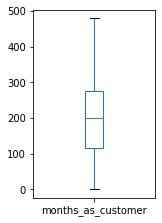

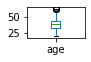

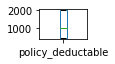

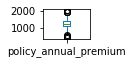

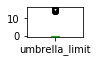

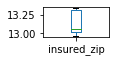

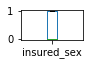

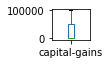

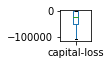

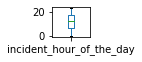

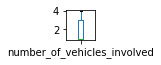

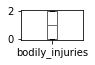

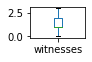

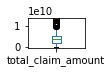

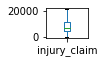

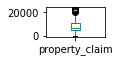

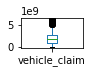

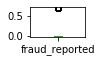

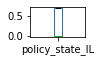

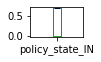

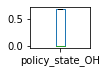

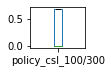

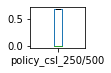

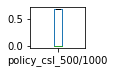

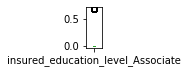

ValueError: num must be 1 <= num <= 25, not 26

<Figure size 432x288 with 0 Axes>

In [86]:
#boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

In [87]:
#Separating X and Y Variable to predict the dataset

X = df.drop("fraud_reported", axis=1)


In [88]:
#Scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.07813958,  0.99083647, -0.22238259, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 0.2089946 ,  0.33407345,  1.41278352, ...,  1.38399852,
        -0.72254413, -0.67655447],
       [-0.60800168, -1.08891308,  1.41278352, ..., -0.72254413,
         1.38399852, -0.67655447],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 2.19064515,  2.3043625 , -0.22238259, ...,  1.38399852,
        -0.72254413, -0.67655447]])

In [89]:
Y = df["fraud_reported"]
Y

0      0.693147
1      0.693147
2      0.000000
3      0.693147
4      0.000000
         ...   
995    0.000000
996    0.000000
997    0.000000
998    0.000000
999    0.000000
Name: fraud_reported, Length: 1000, dtype: float64

In [90]:
#Converting the Y Value into 0 and 1 format
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

array = df['fraud_reported']

array.shape

(1000,)

In [91]:
le=LabelEncoder()
df1=le.fit_transform(df['fraud_reported'])
df1

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [92]:
df['fraud_reported'] = df1

In [93]:
Y = df["fraud_reported"]
Y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [94]:
Y.shape

(1000,)

In [95]:
Y = Y.values.reshape(-1,1)
Y

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [96]:
Y.shape

(1000, 1)

In [97]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=38)

In [98]:
train_X.shape

(780, 167)

In [99]:
test_X.shape

(220, 167)

In [100]:
train_Y.shape

(780, 1)

In [101]:
test_Y.shape

(220, 1)

In [102]:
#Applying Logistic Regression
lg= LogisticRegression()
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
pred=lg.predict(test_X)
print(pred)

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0]


In [104]:
print("accuracy score:",accuracy_score(pred,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,pred))
print("classification_report:\n",classification_report(test_Y,pred))

accuracy score: 0.8227272727272728
confusion_matrix: 
 [[146  17]
 [ 22  35]]
classification_report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       163
           1       0.67      0.61      0.64        57

    accuracy                           0.82       220
   macro avg       0.77      0.75      0.76       220
weighted avg       0.82      0.82      0.82       220



In [105]:
#Using Cross Validation to Check Overfitting,Underfitting and Predict the dataset
from sklearn.model_selection import cross_val_score
cvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print('cvlg1:',cvlg1)

cvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print('cvlg2:',cvlg2)

cvlg1: 0.8191696169616962
cvlg2: 0.827241244756609


In [106]:
#Grid Search Cross Validation for Logistic Regression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

print()

lg2=LogisticRegression(C=1.0,penalty="l1")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.8358974358974359

score 0.8409090909090909


In [107]:
#Boost the Dataset by AdaBoost and GradiantBoost
#Boost the Dataset by AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

print("-----\n")


#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.8871794871794871
[1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
-----

0.9628205128205128
[1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0]


0.8681818181818182

In [108]:
#Boosting though GradientBoost Regressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.7534435139275427
R2 sq:  0.7534435139275427
Mean squared error: 0.11
Test Variance score: 0.44


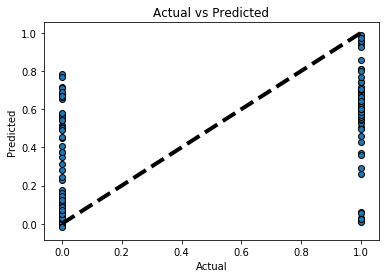

In [110]:
# Visualize the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_title("Actual vs Predicted")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.show()

In [111]:
#Using Naive Bayes Alg
gb=GaussianNB()
gb.fit(train_X,train_Y)


predgb = gb.predict(test_X)
print("accuracy score:",accuracy_score(predgb,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,predgb))
print("classification_report:\n",classification_report(test_Y,predgb))

accuracy score: 0.5590909090909091
confusion_matrix: 
 [[77 86]
 [11 46]]
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61       163
           1       0.35      0.81      0.49        57

    accuracy                           0.56       220
   macro avg       0.61      0.64      0.55       220
weighted avg       0.74      0.56      0.58       220



In [112]:
#Gaussian NB by using Crossval Score
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
gbn=GaussianNB()

score=cross_val_score(gbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(gbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.69117647 0.58823529 0.55882353 0.6119403  0.53731343 0.49253731
 0.6119403  0.65151515 0.62121212 0.39393939 0.77272727 0.57575758
 0.66666667 0.65151515 0.56060606]
Mean Scores 0.5990604020893748
Standard deviation 0.08584252024647232
Y Prediction values
[0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0
 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0
 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 

array([[363, 390],
       [ 64, 183]], dtype=int64)

In [113]:
#using Support Vector Machine
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print("accuracy score:",accuracy_score(predsvc,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,predsvc))
print("classification_report:\n",classification_report(test_Y,predsvc))

accuracy score: 0.7909090909090909
confusion_matrix: 
 [[157   6]
 [ 40  17]]
classification_report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       163
           1       0.74      0.30      0.42        57

    accuracy                           0.79       220
   macro avg       0.77      0.63      0.65       220
weighted avg       0.78      0.79      0.76       220



In [114]:
#Support Vector Machine by using Crossval Scor
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.82587065 0.78606965 0.76       0.77889447 0.81407035]
Mean Scores 0.7929810245256131
Standard Deviation 0.02391833179241881
Y Prediction values
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

0.793

In [115]:
#GridSearchCV for Support Vector Machine
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.755, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.758, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.757, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.755, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.758, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.757, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.755, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.758, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.757, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.755, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   10.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [116]:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [117]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       163
           1       0.75      0.77      0.76        57

    accuracy                           0.87       220
   macro avg       0.83      0.84      0.84       220
weighted avg       0.87      0.87      0.87       220



In [118]:
# Using DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print("accuracy score:",accuracy_score(preddtc,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,preddtc))
print("classification_report:\n",classification_report(test_Y,preddtc))

accuracy score: 0.759090909090909
confusion_matrix: 
 [[135  28]
 [ 25  32]]
classification_report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       163
           1       0.53      0.56      0.55        57

    accuracy                           0.76       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.76      0.76      0.76       220



In [119]:
#DecisionTreeClassifier by using Crossval Scoree
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat


F1-score: [0.66087518 0.73867387 0.66216216 0.71571429 0.66903204]
Mean Scores 0.6892915085404576
Standard Deviation 0.03190835433142484
Y Prediction values
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0

array([[644, 109],
       [119, 128]], dtype=int64)

In [120]:
#using GridSearchCV for DecisionTreeClassifierr
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   18.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [121]:
# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 4, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [122]:
# Re-run predictions and see classification report 

g_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, g_predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       163
           1       0.67      0.88      0.76        57

    accuracy                           0.85       220
   macro avg       0.81      0.86      0.83       220
weighted avg       0.88      0.85      0.86       220



In [123]:
#Boost Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [124]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))
confusion_matrix(test_Y, predictions)

0.8318181818181818


array([[149,  14],
       [ 23,  34]], dtype=int64)

In [126]:
#using RandomForest Classificatior
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.7681818181818182
[[152  11]
 [ 40  17]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       163
           1       0.61      0.30      0.40        57

    accuracy                           0.77       220
   macro avg       0.70      0.62      0.63       220
weighted avg       0.74      0.77      0.74       220



In [127]:
#RandomForestClassifier Using Cross_Val_Score

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.77227723 0.77227723 0.76237624 0.77       0.79       0.77
 0.8        0.83838384 0.80808081 0.78787879]
Mean Scores 0.7871274127412742
Standard Deviation 0.02209334507285264
Y Prediction values
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

array([[709,  44],
       [164,  83]], dtype=int64)

In [128]:
#GridSearchCV for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [129]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       163
           1       0.00      0.00      0.00        57

    accuracy                           0.74       220
   macro avg       0.37      0.50      0.43       220
weighted avg       0.55      0.74      0.63       220



In [130]:
#Bagging of Random Forest Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
bagrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagrf.fit(train_X, train_Y)


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [131]:
predictionsrf = bagrf.predict(test_X)
predictionsrf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [132]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))
confusion_matrix(test_Y, predictionsrf)

0.740909090909091


array([[162,   1],
       [ 56,   1]], dtype=int64)

In [133]:
# Among all Models gridsv gives the highest accuracy(87%) so we are saving this model.


In [134]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 16_Automobile_ins_fruad.csv')

In [135]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(gridsv,'Auto_Insurance_Fraud.pkl')

['Auto_Insurance_Fraud.pkl']

#Auto_Insurance_Claims_amount

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [202]:
data = pd.read_csv('Auto_Insurance_Claims_amount.csv')
data

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
0     Bachelor           2/24/11         Employed  ...   
1     Bachelor           1/31/11       Unemployed  ...   
2     Bachelor           2/19/11         Employed  ...   
3     Bachelor           1/20/11       Unemployed  ...   
4     Bachelor            2/3/11         Employed  ...   
...        ...               ...              ...  ...   
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                     1  Corporate Auto  Corporate L3     Collision   
1                     8   Personal Auto   Personal L3  Scratch/Dent   
2                     2   Personal Auto   Personal L3     Collision   
3                     7  Corporate Auto  Corporate L2     Collision   
4                     1   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch      

In [203]:
#EDA process
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [204]:
data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [207]:
data.keys()

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [205]:
#null values without using visualization
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [208]:
data.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor           2/24/11         Employed  ...   
1  Bachelor           1/31/11       Unemployed  ...   
2  Bachelor           2/19/11         Employed  ...   
3  Bachelor           1/20/11       Unemployed  ...   
4  Bachelor            2/3/11         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                             5                          0                  1   
1                            42                          0                  8   
2                            38                          0                  2   
3                            65                          0                  7   
4                            44                          0                  1   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  

[5 rows x 26 columns]

In [209]:
data.tail()

Customer Country State Code     State  Claim Amount Response  Coverage  \
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch          691.200000  Four-Door Car        Large  
9133    Call Center          369.600000   Two-Door Car      Medsize  

[5 rows x 26 columns]

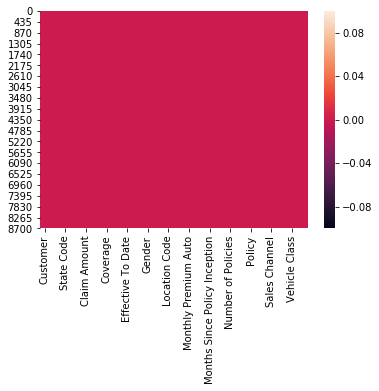

In [210]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [211]:
data = pd.DataFrame(data=data)
data

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
0     Bachelor           2/24/11         Employed  ...   
1     Bachelor           1/31/11       Unemployed  ...   
2     Bachelor           2/19/11         Employed  ...   
3     Bachelor           1/20/11       Unemployed  ...   
4     Bachelor            2/3/11         Employed  ...   
...        ...               ...              ...  ...   
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                     1  Corporate Auto  Corporate L3     Collision   
1                     8   Personal Auto   Personal L3  Scratch/Dent   
2                     2   Personal Auto   Personal L3     Collision   
3                     7  Corporate Auto  Corporate L2     Collision   
4                     1   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch      

In [212]:
#finding the unique values.
data['Customer'].unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [213]:
data['Country'].unique()

array(['US'], dtype=object)

In [214]:
data['State Code'].unique()

array(['KS', 'NE', 'OK', 'MO', 'IA'], dtype=object)

In [215]:
data['State'].unique()

array(['Kansas', 'Nebraska', 'Oklahoma', 'Missouri', 'Iowa'], dtype=object)

In [216]:
data['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [217]:
data['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [218]:
data['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [219]:
data['Effective To Date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [220]:
data['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [221]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [222]:
data['Location Code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [223]:
data['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [224]:
data['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [225]:
data['Claim Reason'].unique()

array(['Collision', 'Scratch/Dent', 'Hail', 'Other'], dtype=object)

In [226]:
data['Sales Channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [227]:
data['Vehicle Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [228]:
data['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [229]:
#deleting some unnecessary column
#customer column is unique,only one value country column,(State Code and State both represents state),



data.drop(['Customer'],axis=1,inplace=True)
data.drop(['Country'],axis=1,inplace=True)
data.drop(['State Code'],axis=1,inplace=True)
data

State  Claim Amount Response  Coverage Education Effective To Date  \
0       Kansas    276.351928       No     Basic  Bachelor           2/24/11   
1     Nebraska    697.953590       No  Extended  Bachelor           1/31/11   
2     Oklahoma   1288.743165       No   Premium  Bachelor           2/19/11   
3     Missouri    764.586183       No     Basic  Bachelor           1/20/11   
4       Kansas    281.369258       No     Basic  Bachelor            2/3/11   
...        ...           ...      ...       ...       ...               ...   
9129  Missouri   2340.598798       No     Basic  Bachelor           2/10/11   
9130  Missouri    309.651122      Yes  Extended   College           2/12/11   
9131  Missouri    816.389043       No  Extended  Bachelor            2/6/11   
9132  Missouri    752.444244       No  Extended   College            2/3/11   
9133  Missouri    261.183687       No  Extended   College           2/14/11   

     EmploymentStatus Gender  Income Location Code  ...  \
0            Employed      F   56274      Suburban  ...   
1          Unemployed      F       0      Suburban  ...   
2            Employed      F   48767      Suburban  ...   
3          Unemployed      M       0      Suburban  ...   
4            Employed      M   43836         Rural  ...   
...               ...    ...     ...           ...  ...   
9129         Employed      M   71941         Urban  ...   
9130         Employed      F   21604      Suburban  ...   
9131       Unemployed      M       0      Suburban  ...   
9132         Employed      M   21941      Suburban  ...   
9133       Unemployed      M       0      Suburban  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

      Number of Policies     Policy Type        Policy  Claim Reason  \
0                      1  Corporate Auto  Corporate L3     Collision   
1                      8   Personal Auto   Personal L3  Scratch/Dent   
2                      2   Personal Auto   Personal L3     Collision   
3                      7  Corporate Auto  Corporate L2     Collision   
4                      1   Personal Auto   Personal L1     Collision   
...                  ...             ...           ...           ...   
9129                   2   Personal Auto   Personal L1          Hail   
9130                   1  Corporate Auto  Corporate L3     Collision   
9131                   2  Corporate Auto  Corporate L2     Collision   
9132                   3   Personal Auto   Personal L2  Scratch/Dent   
9133                   1  Corporate Auto  Corporate L3         Other   

     Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0            Agent         384.811147   Two-Door Car      Medsize  
1            Agent        1131.464935  Four-Door Car      Medsize  
2            Agent         566.472247   Two-Door Car      Medsize  
3      Call Center         529.881344            SUV      Medsize  
4            Agent         138.130879  Four-Door Car      Medsize  
...            ...                ...            ...          ...  
9129           Web         198.234764  Four-Door Car      Medsize  
9130        Branch         379.200000  Four-Door Car      Medsize  
9131        Branch         790.784983  Four-Door Car      Medsize  
9132        Branch       

In [230]:
#Convert the Dataset to Numeric(boolean) Format using the Label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [231]:
#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==2):
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])
        
#For all those columns who has 3 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==3):
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])
        
#For all those columns who has 4 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==4):
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])
        
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==5):
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])
        
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==6):
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])
        
#For all those columns who has 9 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==9):
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])
        
        
data

State  Claim Amount  Response  Coverage  Education Effective To Date  \
0         1    276.351928         0         0          0           2/24/11   
1         3    697.953590         0         1          0           1/31/11   
2         4   1288.743165         0         2          0           2/19/11   
3         2    764.586183         0         0          0           1/20/11   
4         1    281.369258         0         0          0            2/3/11   
...     ...           ...       ...       ...        ...               ...   
9129      2   2340.598798         0         0          0           2/10/11   
9130      2    309.651122         1         1          1           2/12/11   
9131      2    816.389043         0         1          0            2/6/11   
9132      2    752.444244         0         1          1            2/3/11   
9133      2    261.183687         0         1          1           2/14/11   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0                    1       0   56274              1  ...   
1                    4       0       0              1  ...   
2                    1       0   48767              1  ...   
3                    4       1       0              1  ...   
4                    1       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129                 1       1   71941              2  ...   
9130                 1       0   21604              1  ...   
9131                 4       1       0              1  ...   
9132                 1       1   21941              1  ...   
9133                 4       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      0            0       2             0              0   
1                      7            1       5             3              0   
2                      1            1       5             0              0   
3                      6            0       1             0              2   
4                      0            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   1            1       3             1              3   
9130                   0            0       2             0              1   
9131                   1            0       1             0              1   
9132                   2            1       4             3              1   
9133                   0            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.200000          

In [232]:
data.dtypes

State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                 object
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

In [233]:
#formatting the date column to numeric
array = data['Effective To Date']

array.shapearray = data['Effective To Date']

array.shape

(9134,)

In [234]:
le=LabelEncoder()
data1=le.fit_transform(data['Effective To Date'])
data1

array([47, 24, 41, ..., 55, 52, 36])

In [235]:
data['Effective To Date']=data1

In [236]:
data

State  Claim Amount  Response  Coverage  Education  Effective To Date  \
0         1    276.351928         0         0          0                 47   
1         3    697.953590         0         1          0                 24   
2         4   1288.743165         0         2          0                 41   
3         2    764.586183         0         0          0                 12   
4         1    281.369258         0         0          0                 52   
...     ...           ...       ...       ...        ...                ...   
9129      2   2340.598798         0         0          0                 32   
9130      2    309.651122         1         1          1                 34   
9131      2    816.389043         0         1          0                 55   
9132      2    752.444244         0         1          1                 52   
9133      2    261.183687         0         1          1                 36   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0                    1       0   56274              1  ...   
1                    4       0       0              1  ...   
2                    1       0   48767              1  ...   
3                    4       1       0              1  ...   
4                    1       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129                 1       1   71941              2  ...   
9130                 1       0   21604              1  ...   
9131                 4       1       0              1  ...   
9132                 1       1   21941              1  ...   
9133                 4       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      0            0       2             0              0   
1                      7            1       5             3              0   
2                      1            1       5             0              0   
3                      6            0       1             0              2   
4                      0            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   1            1       3             1              3   
9130                   0            0       2             0              1   
9131                   1            0       1             0              1   
9132                   2            1       4             3              1   
9133                   0            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.2000

In [237]:
data['Effective To Date'].unique()

array([47, 24, 41, 12, 52, 17,  9, 18, 39, 44, 27, 55,  1,  8, 26, 50,  5,
       13, 54, 21, 51, 34, 42, 56, 14, 35,  6, 29,  2, 20, 57, 46, 11, 38,
       19, 15, 30, 33, 53, 31, 37, 49,  7,  0, 32, 16, 48,  3, 58, 10, 25,
       36, 43, 40, 22,  4, 23, 45, 28], dtype=int64)

In [238]:
data.dtypes

State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

In [239]:
#null values using the visuvalization
data.isnull().sum()

State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

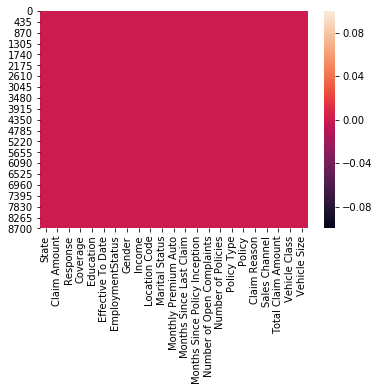

In [240]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [241]:
data = pd.DataFrame(data=data)
data

State  Claim Amount  Response  Coverage  Education  Effective To Date  \
0         1    276.351928         0         0          0                 47   
1         3    697.953590         0         1          0                 24   
2         4   1288.743165         0         2          0                 41   
3         2    764.586183         0         0          0                 12   
4         1    281.369258         0         0          0                 52   
...     ...           ...       ...       ...        ...                ...   
9129      2   2340.598798         0         0          0                 32   
9130      2    309.651122         1         1          1                 34   
9131      2    816.389043         0         1          0                 55   
9132      2    752.444244         0         1          1                 52   
9133      2    261.183687         0         1          1                 36   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0                    1       0   56274              1  ...   
1                    4       0       0              1  ...   
2                    1       0   48767              1  ...   
3                    4       1       0              1  ...   
4                    1       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129                 1       1   71941              2  ...   
9130                 1       0   21604              1  ...   
9131                 4       1       0              1  ...   
9132                 1       1   21941              1  ...   
9133                 4       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      0            0       2             0              0   
1                      7            1       5             3              0   
2                      1            1       5             0              0   
3                      6            0       1             0              2   
4                      0            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   1            1       3             1              3   
9130                   0            0       2             0              1   
9131                   1            0       1             0              1   
9132                   2            1       4             3              1   
9133                   0            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.2000

In [244]:
#finding the corelation
dfcor=data.corr()
dfcor

State  Claim Amount  Response  Coverage  \
State                          1.000000     -0.007798 -0.001732  0.008352   
Claim Amount                  -0.007798      1.000000 -0.006259  0.220307   
Response                      -0.001732     -0.006259  1.000000  0.000280   
Coverage                       0.008352      0.220307  0.000280  1.000000   
Education                      0.004256      0.029317  0.000285  0.022528   
Effective To Date             -0.000448     -0.012767 -0.043133  0.005740   
EmploymentStatus              -0.003751     -0.048243 -0.008671  0.007114   
Gender                         0.000545     -0.011072  0.004396 -0.015726   
Income                         0.002682      0.041918  0.011932 -0.014182   
Location Code                  0.001382      0.003582  0.001729 -0.018220   
Marital Status                -0.008975     -0.033649 -0.094843  0.001766   
Monthly Premium Auto          -0.000917      0.461131  0.010606  0.506815   
Months Since Last Claim        0.009249      0.009432 -0.016597  0.016640   
Months Since Policy Inception -0.004459      0.001316  0.002952  0.009316   
Number of Open Complaints      0.015200     -0.037972 -0.014262 -0.006407   
Number of Policies            -0.008267      0.361751 -0.031023 -0.018731   
Policy Type                   -0.009102      0.018362  0.001110  0.002766   
Policy                        -0.014193      0.012478 -0.001461 -0.001198   
Claim Reason                   0.002564     -0.093169 -0.131415 -0.044662   
Sales Channel                  0.002662     -0.014347 -0.086607 -0.028655   
Total Claim Amount             0.002567      0.182928  0.049672  0.212886   
Vehicle Class                 -0.004813      0.103862  0.021225 -0.017606   
Vehicle Size                  -0.000956      0.019862 -0.050691 -0.005661   

                               Education  Effective To Date  EmploymentStatus  \
State                           0.004256          -0.000448         -0.003751   
Claim Amount                    0.029317          -0.012767         -0.048243   
Response                        0.000285          -0.043133         -0.008671   
Coverage                        0.022528           0.005740          0.007114   
Education                       1.000000           0.001276         -0.028035   
Effective To Date               0.001276           1.000000         -0.000944   
EmploymentStatus               -0.028035          -0.000944          1.000000   
Gender                          0.002206          -0.013322          0.040422   
Income                          0.018709          -0.000531         -0.658870   
Location Code                  -0.011533          -0.001960          0.014778   
Marital Status                  0.005675          -0.014265          0.298114   
Monthly Premium Auto            0.027980           0.007718          0.008331   
Months Since Last Claim         0.003021          -0.003912          0.008701   
Months Since Policy Inception   0.004140           0.008281          0.015166   
Number of Open Complaints      -0.021060          -0.009072          0.011004   
Number of Policies              0.008491           0.002932          0.006944   
Policy Type                     0.011650          -0.007466         -0.002898   
Policy                          0.011119          -0.006625          0.000428   
Claim Reason                    0.059085           0.000626         -0.110389   
Sales Channel                  -0.005018          -0.010888         -0.019699   
Total Claim Amount              0.014958          -0.003560          0.293459   
Vehicle Class                   0.010192          -0.019002         -0.005341   
Vehicle Size                   -0.005491           0.005368         -0.012229   

                                 Gender    Income  Location Code  ...  \
State                          0.000545  0.002682       0.001382  ...   
Claim Amount                  -0.011072  0.041918       0.003582  ...   
Response             

In [242]:
#Check Skewness 
data.skew()

State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount               1.714966
Vehicle Class                    0.395146
Vehicle Size                     0.072742
dtype: float64

In [243]:
##there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])
    if data.skew().loc[i]<-0.55:
        data[i]=np.square(data[i])
        
data.skew()

State                            0.021065
Claim Amount                     0.578248
Response                         2.037567
Coverage                         0.700634
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.402923
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.433288
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.226491
Sales Channel                    0.506774
Total Claim Amount              -0.855795
Vehicle Class                    0.395146
Vehicle Size                     0.072742
dtype: float64

In [245]:
#finding the outliers
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(data))
print('data.shape:',data.shape)
df1=data.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

data.shape: (9134, 23)
df1.shape: (8692, 23)
z value is: [[0.55068994 1.26193851 0.40882171 ... 0.11485124 1.49918077 0.16668206]
 [0.97332215 0.15600962 0.40882171 ... 1.6464175  0.91292371 0.16668206]
 [1.73532819 1.09581011 0.40882171 ... 0.63445001 1.49918077 0.16668206]
 ...
 [0.21131611 0.39614082 0.40882171 ... 1.10924477 0.91292371 0.16668206]
 [0.21131611 0.27117422 0.40882171 ... 0.91472629 0.91292371 2.0278971 ]
 [0.21131611 1.34821814 0.40882171 ... 0.06255937 1.49918077 0.16668206]]


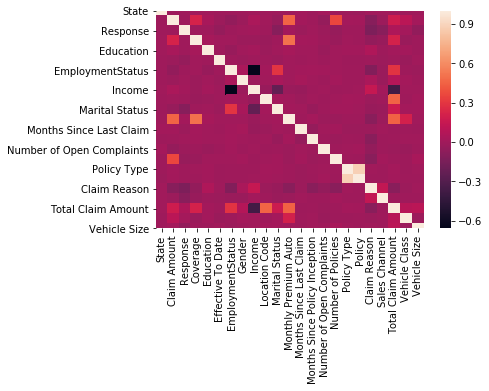

In [246]:
sns.heatmap(dfcor)

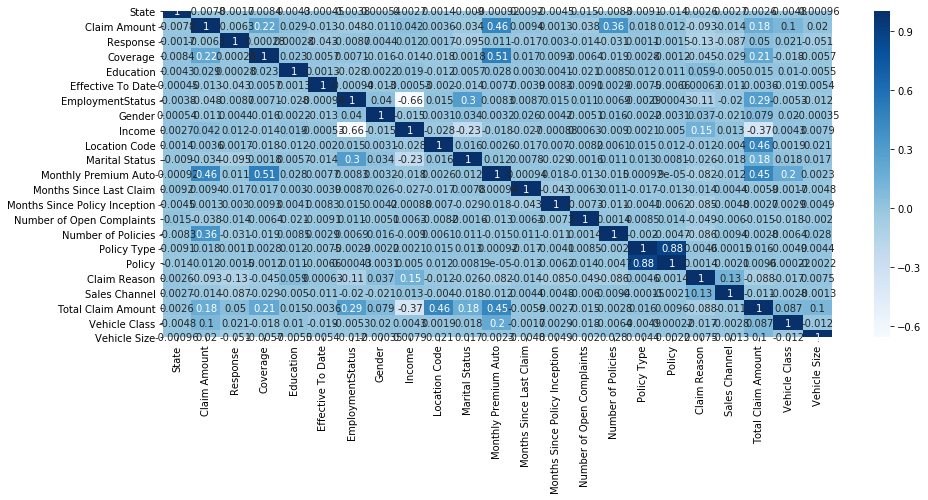

In [247]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

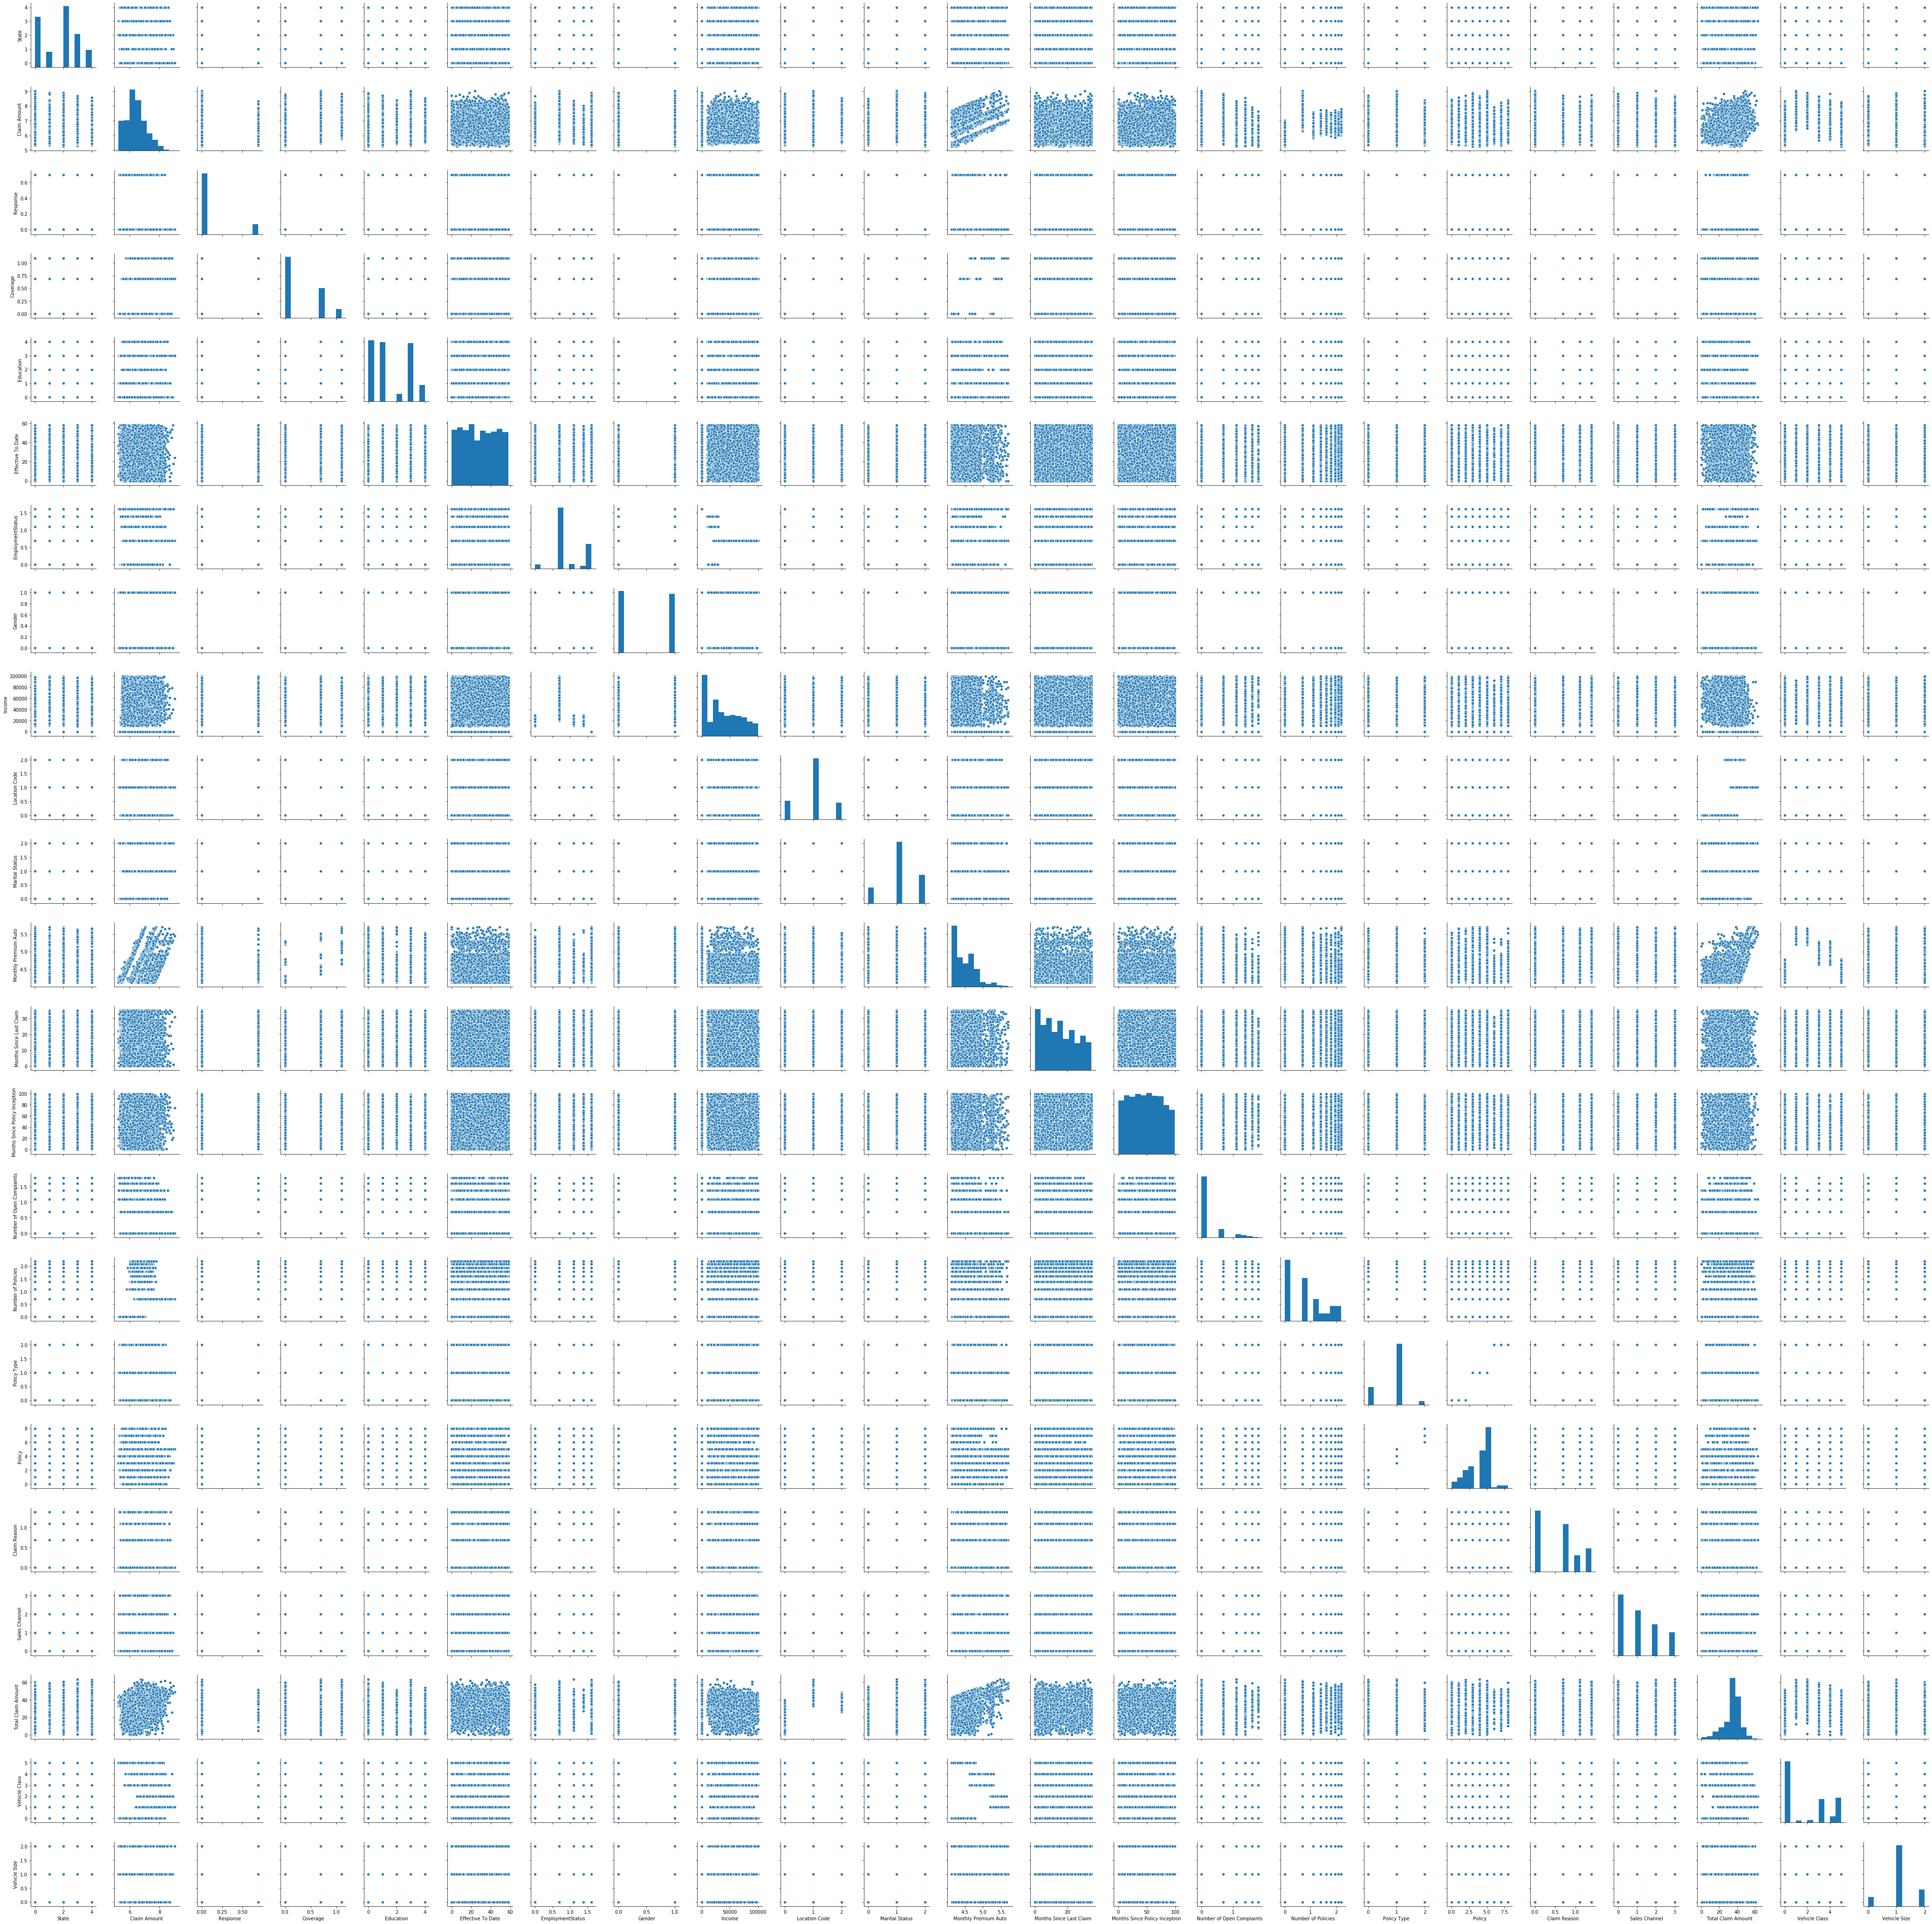

In [248]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

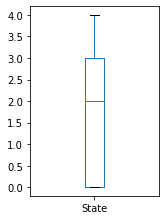

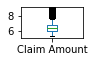

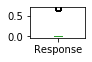

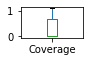

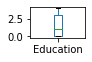

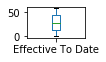

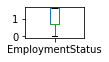

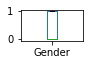

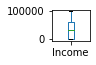

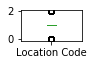

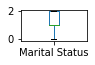

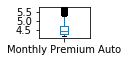

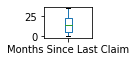

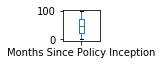

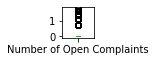

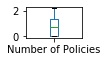

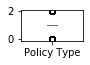

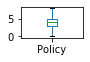

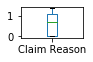

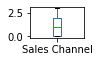

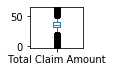

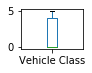

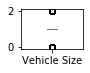

In [249]:
#Boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

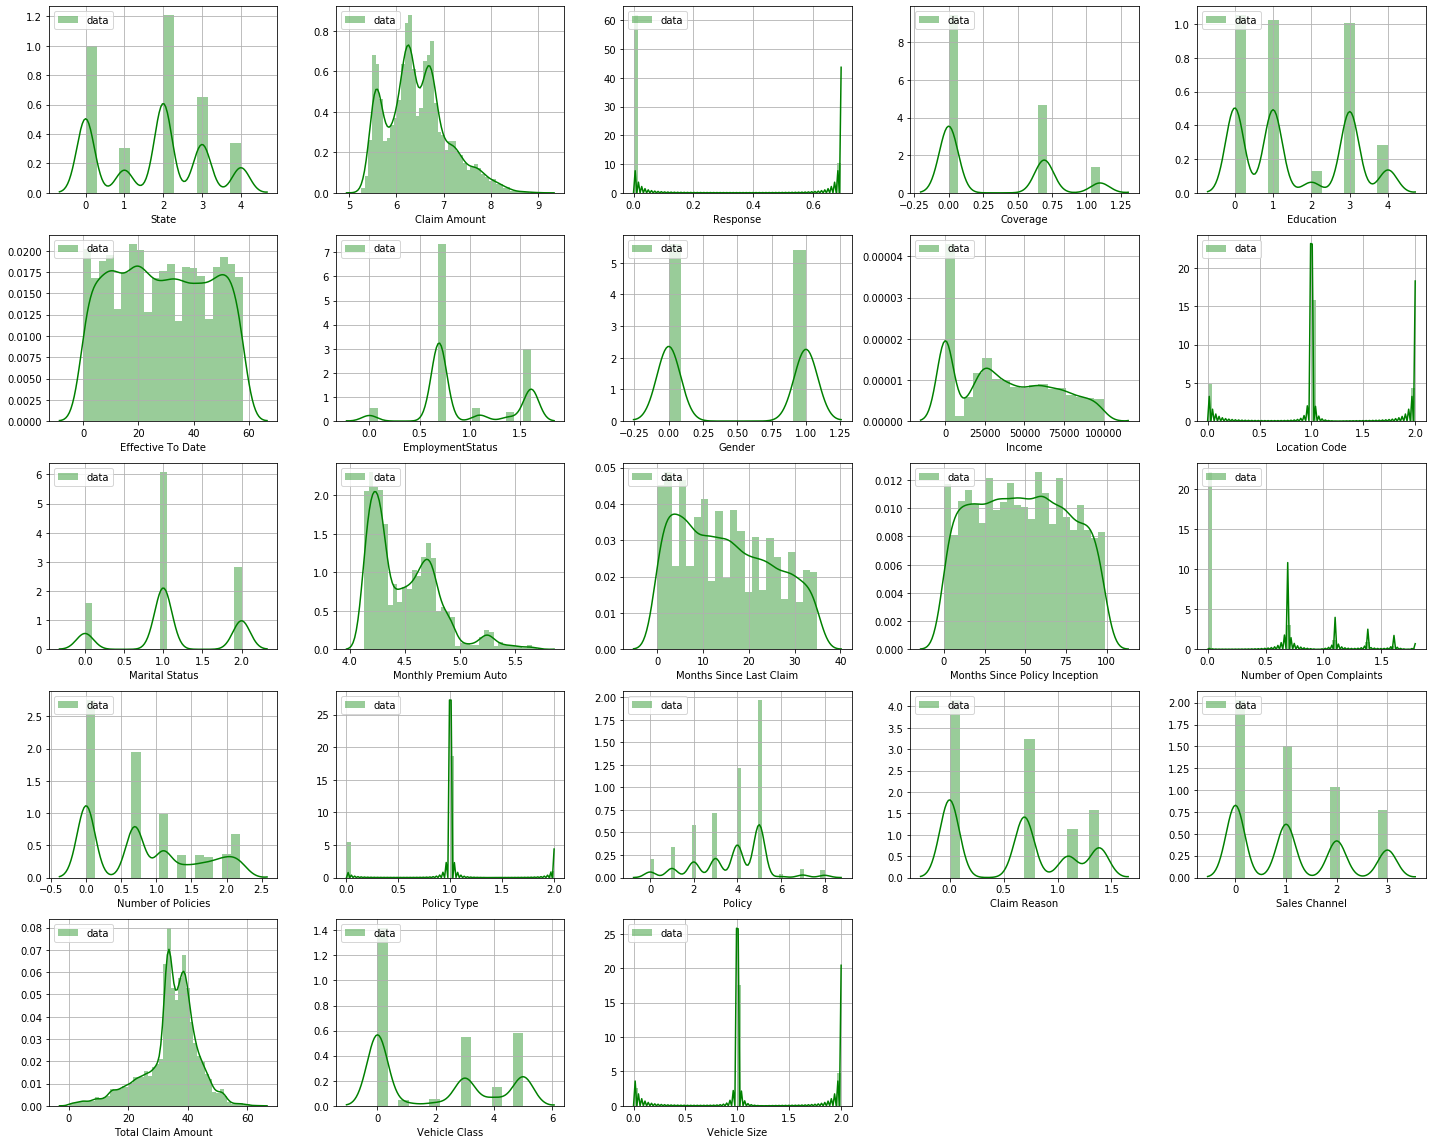

In [253]:
#Distiplot
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

In [254]:
data.describe()

State  Claim Amount     Response     Coverage    Education  \
count  9134.000000   9134.000000  9134.000000  9134.000000  9134.000000   
mean      1.722684      6.447889     0.099260     0.307189     1.554084   
std       1.312397      0.651891     0.242807     0.398453     1.381978   
min       0.000000      5.251230     0.000000     0.000000     0.000000   
25%       0.000000      5.992527     0.000000     0.000000     0.000000   
50%       2.000000      6.361334     0.000000     0.000000     1.000000   
75%       3.000000      6.799297     0.000000     0.693147     3.000000   
max       4.000000      9.028043     0.693147     1.098612     4.000000   

       Effective To Date  EmploymentStatus       Gender        Income  \
count        9134.000000       9134.000000  9134.000000   9134.000000   
mean           28.625575          0.935423     0.490037  37657.380009   
std            17.017215          0.445211     0.499928  30379.904734   
min             0.000000          0.000000     0.000000      0.000000   
25%            14.000000          0.693147     0.000000      0.000000   
50%            28.000000          0.693147     0.000000  33889.500000   
75%            44.000000          1.609438     1.000000  62320.000000   
max            58.000000          1.609438     1.000000  99981.000000   

       Location Code  ...  Months Since Policy Inception  \
count    9134.000000  ...                    9134.000000   
mean        0.979089  ...                      48.064594   
std         0.605732  ...                      27.905991   
min         0.000000  ...                       0.000000   
25%         1.000000  ...                      24.000000   
50%         1.000000  ...                      48.000000   
75%         1.000000  ...                      71.000000   
max         2.000000  ...                      99.000000   

       Number of Open Complaints  Number of Policies  Policy Type  \
count                9134.000000         9134.000000  9134.000000   
mean                    0.203262            0.801068     0.825925   
std                     0.429742            0.739422     0.475989   
min                     0.000000            0.000000     0.000000   
25%                     0.000000            0.000000     1.000000   
50%                     0.000000            0.693147     1.000000   
75%                     0.000000            1.386294     1.000000   
max                     1.791759            2.197225     2.000000   

            Policy  Claim Reason  Sales Channel  Total Claim Amount  \
count  9134.000000   9134.000000    9134.000000         9134.000000   
mean      3.797788      0.562547       1.102693           34.417444   
std       1.605978      0.523532       1.069452            9.131669   
min       0.000000      0.000000       0.000000            0.008913   
25%       3.000000      0.000000       0.000000           31.476782   
50%       4.000000      0.693147       1.000000           35.439418   
75%       5.000000      1.098612       2.000000           39.780952   
max       8.000000      1.386294       3.000000           63.528515   

       Vehicle Class  Vehicle Size  
count    9134.000000   9134.000000  
mean        1.892380      1.089556  
std         2.072992      0.537313  
min         0.000000      0.000000  
25%         0.000000      1.000000  
50%         0.000000      1.000000  
75%         4.000000      1.000000  
max         5.000000      2.000000  

[8 rows x 23 columns]

In [255]:
data.keys()

Index(['State', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Claim Reason', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

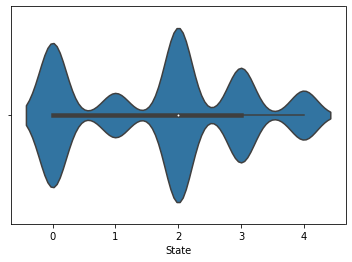

In [256]:
#violin plot representation with respect to each column

sns.violinplot(x="State",data=data)

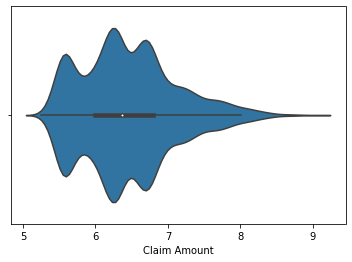

In [257]:
#violin plot representation with respect to each column

sns.violinplot(x="Claim Amount",data=data)

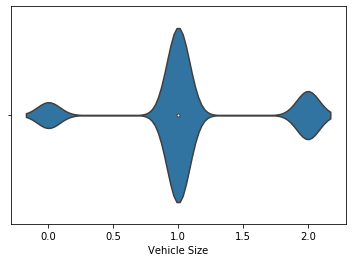

In [258]:
sns.violinplot(x="Vehicle Size",data=data)

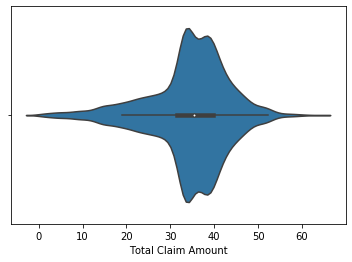

In [259]:
sns.violinplot(x="Total Claim Amount",data=data)

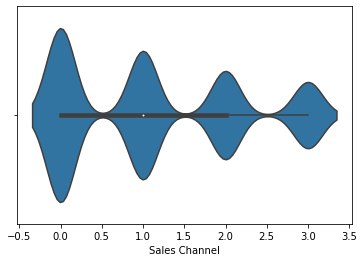

In [260]:
sns.violinplot(x="Sales Channel",data=data)

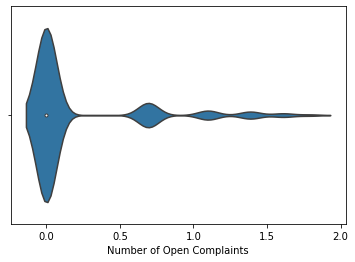

In [261]:
sns.violinplot(x="Number of Open Complaints",data=data)

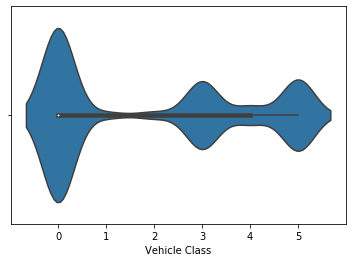

In [262]:
sns.violinplot(x="Vehicle Class",data=data)

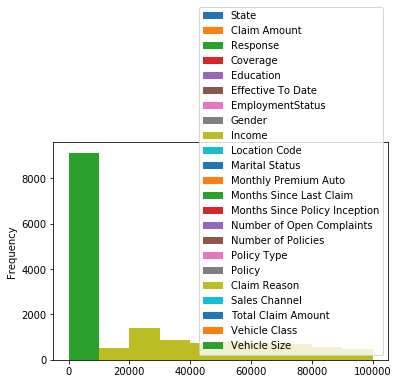

In [265]:
data.plot.hist()

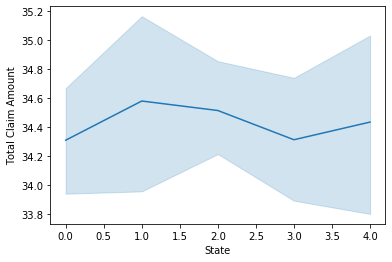

In [266]:
#Lets check the how State is changing with respect to Total Claim Amount
sns.lineplot(data["State"],data["Total Claim Amount"])
plt.show()

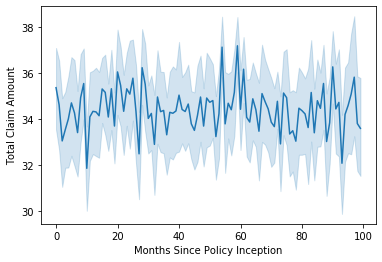

In [267]:
sns.lineplot(data["Months Since Policy Inception"],data["Total Claim Amount"])
plt.show()

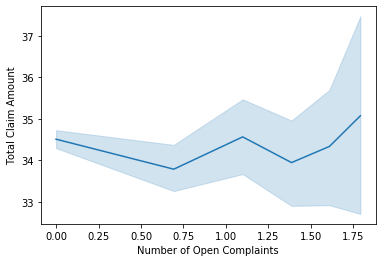

In [268]:
sns.lineplot(data["Number of Open Complaints"],data["Total Claim Amount"])
plt.show()

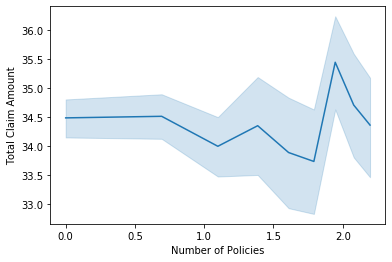

In [269]:
sns.lineplot(data["Number of Policies"],data["Total Claim Amount"])
plt.show()

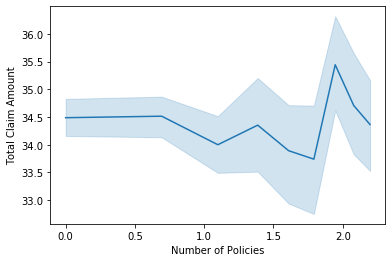

In [270]:
sns.lineplot(data["Number of Policies"],data["Total Claim Amount"])
plt.show()

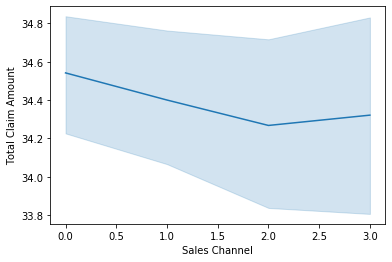

In [271]:
sns.lineplot(data["Sales Channel"],data["Total Claim Amount"])
plt.show()

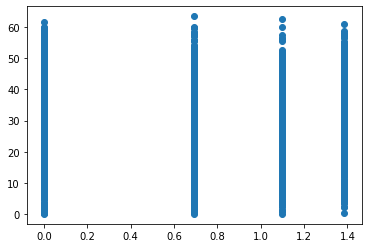

In [273]:
#Scatter plot
plt.scatter(data['Claim Reason'],data['Total Claim Amount'])

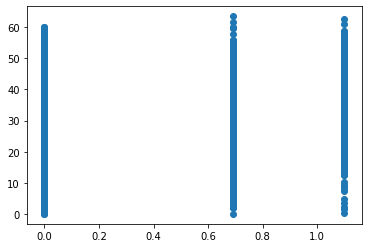

In [275]:
plt.scatter(data['Coverage'],data['Total Claim Amount'])

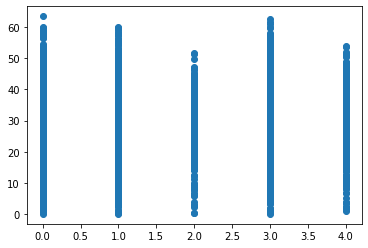

In [276]:
plt.scatter(data['Education'],data['Total Claim Amount'])

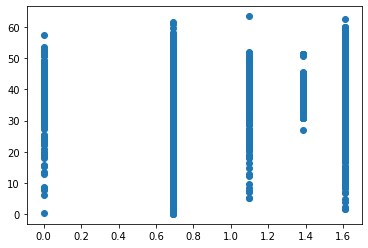

In [277]:
plt.scatter(data['EmploymentStatus'],data['Total Claim Amount'])

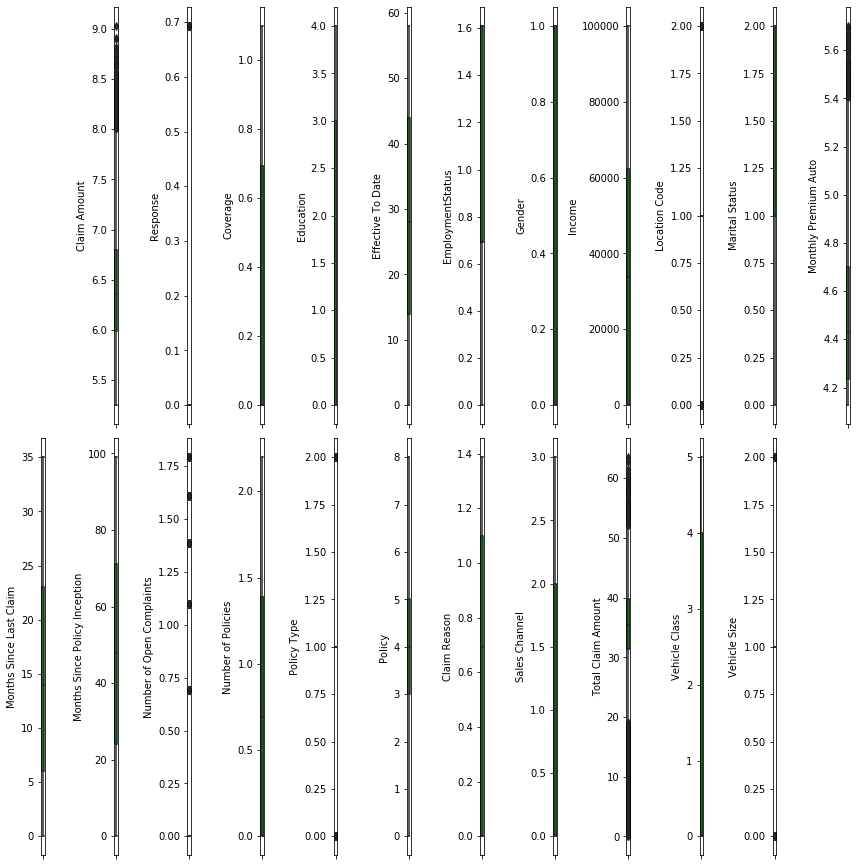

In [278]:

#column plot
collist = data.columns.values
ncols=12
nrows=10

plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

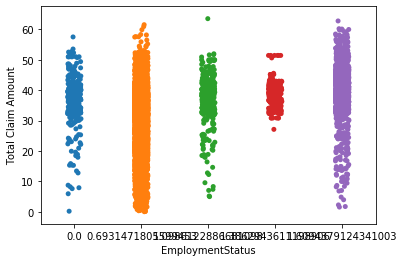

In [279]:
#Striplot

ax=sns.stripplot(x='EmploymentStatus',y="Total Claim Amount",data=data);

In [281]:
#Separating X and Y Variable to predict the dataset

X = data.drop("Total Claim Amount", axis=1)
X

State  Claim Amount  Response  Coverage  Education  Effective To Date  \
0         1      5.625287  0.000000  0.000000          0                 47   
1         3      6.549584  0.000000  0.693147          0                 24   
2         4      7.162198  0.000000  1.098612          0                 41   
3         2      6.640642  0.000000  0.000000          0                 12   
4         1      5.643216  0.000000  0.000000          0                 52   
...     ...           ...       ...       ...        ...                ...   
9129      2      7.758589  0.000000  0.000000          0                 32   
9130      2      5.738670  0.693147  0.693147          1                 34   
9131      2      6.706115  0.000000  0.693147          0                 55   
9132      2      6.624655  0.000000  0.693147          1                 52   
9133      2      5.569045  0.000000  0.693147          1                 36   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0             0.693147       0   56274              1  ...   
1             1.609438       0       0              1  ...   
2             0.693147       0   48767              1  ...   
3             1.609438       1       0              1  ...   
4             0.693147       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129          0.693147       1   71941              2  ...   
9130          0.693147       0   21604              1  ...   
9131          1.609438       1       0              1  ...   
9132          0.693147       1   21941              1  ...   
9133          1.609438       1       0              1  ...   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies  Policy Type  Policy  \
0                      0.000000            0.000000            0       2   
1                      0.000000            2.079442            1       5   
2                      0.000000            0.693147            1       5   
3                      0.000000            1.945910            0       1   
4                      0.000000            0.000000            1       3   
...                         ...                 ...          ...     ...   
9129                   0.000000            0.693147            1       3   
9130                   0.000000            0.000000            0       2   
9131                   1.386294            0.693147            0       1   
9132                   0.000000            1.098612            1       4   
9133                   0.000000            0.000000            0       2   

      Claim Reason  Sales Channel  Vehicle Class  Vehicle Size  
0         0.000000              0              5             1  
1         1.386294              0              0             1  
2         0.000000              0              5             1  
3         0.000000              2              3             1  
4         0.000000              0              0             1  
...            ...            ...            ...           ...  
9129      0.693147              3              0             1  
9130      0.000000              1              0             1  
9131      0.000000              1            

In [282]:
Y = data["Total Claim Amount"]
Y

0       35.466170
1       49.451160
2       40.210714
3       39.369834
4       24.358322
          ...    
9129    28.031559
9130    35.291886
9131    44.546145
9132    42.769964
9133    34.988684
Name: Total Claim Amount, Length: 9134, dtype: float64

In [283]:
X.shape


(9134, 22)

In [285]:
Y.shape  #column value 1 is available

(9134,)

In [286]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.35,random_state=39)

In [287]:
train_X.shape

(5937, 22)

In [288]:
train_Y.shape

(5937,)

In [289]:
test_X.shape

(3197, 22)

In [290]:
test_Y.shape

(3197,)

In [291]:
#Applying linear regression techinque
lg = LinearRegression()
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
lg.score(train_X,train_Y)

0.555179216342935

In [293]:
lg.coef_

array([ 9.26269116e-03, -7.64206342e-03,  2.34309456e+00, -3.26392735e-01,
        6.17044477e-02,  9.27222525e-04,  1.54832053e+00,  1.30100190e+00,
       -8.27837948e-05,  6.88837698e+00,  1.16420920e+00,  1.33567984e+01,
       -1.57334574e-02, -3.00816007e-03, -4.19946996e-02, -4.22855446e-02,
        2.67843571e-01, -7.60309226e-02,  1.90760929e-01,  6.39314406e-02,
        8.19891739e-03,  1.65939446e+00])

In [294]:
lg.intercept_

-34.329906863026366

In [295]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result e:",pred)
print("actual price",test_Y)

Predicted result e: [37.15603259 25.72766989 36.97157853 ... 23.45016248 34.14179521
 44.99834668]
actual price 2011    35.975559
8237    37.519527
2790    39.492224
1462    42.125714
2094    28.063927
          ...    
2479    32.859668
2383    36.602606
8785    12.688322
1092    31.475096
7605    38.880433
Name: Total Claim Amount, Length: 3197, dtype: float64


In [296]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 4.587228506038739
Mean sqaured error: 35.240170434697895
Root mean squared error: 5.936343187072147


In [297]:
#Boost through GradientBoostRegressor By using Parameter
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [298]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.8620992377573728
Mean squared error: 13.86
R2 Score: 0.83


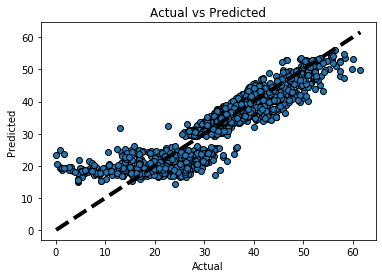

In [299]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)

ax.set_title("Actual vs Predicted")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.show()

In [300]:
# Linear Regression using Recursion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [301]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.5597768391538724
r2 score corresponding to  43 is 0.5271972805250786
r2 score corresponding to  44 is 0.5633021666488177
r2 score corresponding to  45 is 0.5623188132568904
r2 score corresponding to  46 is 0.5658048672361519
r2 score corresponding to  47 is 0.5786068870863674
r2 score corresponding to  48 is 0.5632350145514337
r2 score corresponding to  49 is 0.5554984026217706
r2 score corresponding to  50 is 0.5549409720030101
r2 score corresponding to  51 is 0.5778527848774399
r2 score corresponding to  52 is 0.5590953940250198
r2 score corresponding to  53 is 0.5645843232051628
r2 score corresponding to  54 is 0.5732012433959142
r2 score corresponding to  55 is 0.5848684284010498
r2 score corresponding to  56 is 0.5461363296217078
r2 score corresponding to  57 is 0.5575366154750508
r2 score corresponding to  58 is 0.5539831654104959
r2 score corresponding to  59 is 0.5559058002541679
r2 score corresponding to  60 is 0.5744310937721817
r2 score cor

In [302]:
#Boosting Linear Regression
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7723909795285431
std deviation in r2 score for ada boosting Regression:  0.00814323878759297


In [303]:
#KNN Model to predict

from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 82.58
R2 Score of linear svc: 0.04


In [304]:
# use grid_search to find optimal value of n_neighbors for KNN Model
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 29}

In [305]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=29)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.12558209298946876
r2 score corresponding to  43 is 0.13995847206305523
r2 score corresponding to  44 is 0.1133297074009878
r2 score corresponding to  45 is 0.13268799110889162
r2 score corresponding to  46 is 0.1267143966678096
r2 score corresponding to  47 is 0.1404697024567254
r2 score corresponding to  48 is 0.12424766857299696
r2 score corresponding to  49 is 0.11820910511159344
r2 score corresponding to  50 is 0.15270312743531067
r2 score corresponding to  51 is 0.12918532862805343
r2 score corresponding to  52 is 0.11520536486596689
r2 score corresponding to  53 is 0.12620971998587938
r2 score corresponding to  54 is 0.11830565878567922
r2 score corresponding to  55 is 0.13369693597912746
r2 score corresponding to  56 is 0.11845357583991512
r2 score corresponding to  57 is 0.14984308816873715
r2 score corresponding to  58 is 0.12553718868277364
r2 score corresponding to  59 is 0.12524603927881628
r2 score corresponding to  60 is 0.12695557989798

In [306]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.5579863493946531
std deviation in r2 scorefor Linear Regression: 0.01498013226413622

Mean r2 score for KNN Regression:  0.1314394391503418
std deviation in r2 score for KNN Regression: 0.013422814362583883


In [307]:
#Boosting KNN modl
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7774043169275983
std deviation in r2 score for ada boosting Regression:  0.00714563613886023


In [308]:
#check lasso regression and best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [310]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.5579990600807918
std deviation in r2 score for Lasso Regression:  0.014932016608618419


In [311]:
#Boosting Lasso Regresso
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7793950136775549
std deviation in r2 score for ada boosting Regression:  0.0062019180006927434


In [312]:
##Decision Tree regressor (DTR)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


In [313]:
#predict the value
pred=dtregressor.predict(test_X)
print("Predicted result price:",y_pred4)
print("actual price",test_Y)

Predicted result price: [34.68070692 42.90541905 26.56988109 ... 39.66286042 37.82991442
 44.92614969]
actual price 922     34.680707
3230    42.905419
5454    26.569881
1233    34.187999
8915     2.199283
          ...    
1087    33.537797
8741    12.321441
6117    39.662860
4593    37.829914
3927    44.926150
Name: Total Claim Amount, Length: 1827, dtype: float64


In [314]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y5))
print('R2 Score : %.2f' % r2_score(test_Y, y5))

Mean squared error of poly svc: 16.34
R2 Score : 0.81


In [316]:
# Random Forest Regressor with GridSearchCV
rf_gs = RandomForestRegressor(n_estimators=150)
n_features = X.shape[1]

In [317]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 8, 'max_depth': 13}


In [318]:
rf_gss = RandomForestRegressor(max_features = 6, max_depth = 20)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.8205270170324397
std deviation in r2 score for ada boosting Regression:  0.006552680565492057


In [319]:
#Boosting RandomForestRegresser
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.8332942810475752
std deviation in r2 score for ada boosting Regression:  0.0075510306161407975


In [322]:
# all models,dtregressor gives the Highest r2 score(1) and mean squared error is zero
#so am going to save this model

In [326]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 16.1_AAutomobile Insurance.csv')

In [328]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'AAutomobile Insurance1.pkl')

['AAutomobile Insurance1.pkl']